In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis

### 1. Price Trend Analysis

##### Plot closing prices for 5 different stocks (one from each sector)
##### Identify uptrends, downtrends, and sideways periods visually

In [2]:
df = pd.read_csv('clean_clipped_data.csv')

In [3]:
df.head(3)

ticker        date    open    high     low   close     volume  \
0  STK001  2021-01-04  158.09  160.97  158.09  160.11   962644.0   
1  STK001  2021-01-05  163.16  165.50  160.76  162.36  1312685.0   
2  STK001  2021-01-06  161.89  162.51  160.94  161.78  1449177.0   

   adjusted_close      sma_20      sma_50  ...  atr_14  volume_sma_20  \
0          160.11  160.110000  160.110000  ...   2.880    1121206.855   
1          162.36  161.235000  161.235000  ...   4.135    1137664.500   
2          161.78  161.416667  161.416667  ...   3.280    1241502.000   

   volume_ratio  momentum_10  momentum_20  price_to_sma_50  volatility_20  \
0      1.000000    -0.008557    -0.045594         0.000000       0.012463   
1      1.153842    -0.008557    -0.045594         0.006977       0.012463   
2      1.167277    -0.008557    -0.045594         0.002251       0.012463   

   future_return_5d  trend_label      sector  
0          0.026357      Uptrend  Technology  
1          0.018169     Sideways  Technology  
2         -0.012301     Sideways  Technology  

[3 rows x 32 columns]

Selected stocks: ['STK013' 'STK017' 'STK009' 'STK005' 'STK001']


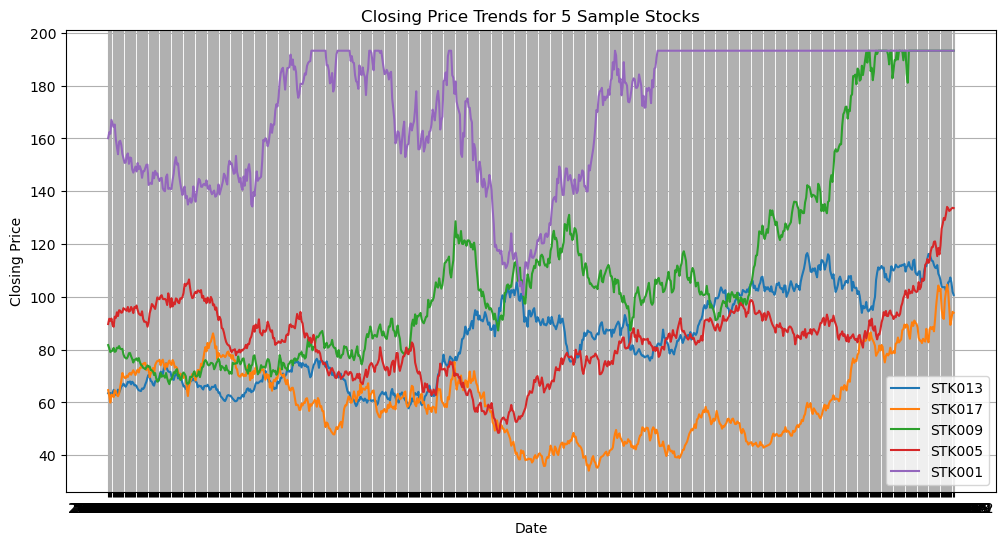

In [4]:
# Pick one stock per sector (5 sectors)
sample_stocks = df.groupby('sector')['ticker'].first().head(5).values
print("Selected stocks:", sample_stocks)

# Price trends
plt.figure(figsize=(12,6))
for t in sample_stocks:
    subset = df[df['ticker'] == t]
    plt.plot(subset['date'], subset['close'], label=t)

plt.title('Closing Price Trends for 5 Sample Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


Uptrend: **STK009 (CapitalBank)** line goes steadily upward (prices rising).

Downtrend: **STK017 (PowerGen)** line slopes downward.

Sideways: **STK001 (TechCorp)** line fluctuates horizontally with little direction.

Most stocks show the expected co-movement with market-level trends; returns are **centred near zero** with occasional fat tails (large moves)

#### Calculate basic statistics: mean, median, std dev of returns

In [5]:
# Calculate daily returns
df['return'] = df.groupby('ticker')['close'].pct_change() * 100  # percentage

# Basic stats for each stock
stats = df.groupby('ticker')['return'].agg(['mean', 'median', 'std']).round(2)
print(stats.loc[sample_stocks])


        mean  median   std
ticker                    
STK013  0.08    0.11  1.89
STK017  0.09    0.17  2.97
STK009  0.14    0.00  2.25
STK005  0.07   -0.01  2.15
STK001  0.04    0.00  1.94


Mean: **STK009 (CapitalBank)** exprerience highest average daily return

Median: **STK017 (PowerGen)** has the highest typical return 

Std: volatility **(STK017 (PowerGen)** has highest price movement)

### 2. Sector Comparison

In [6]:
# Sector-level average return and volatility
sector_stats = df.groupby('sector')['return'].agg(
    avg_return='mean', volatility='std'
).round(2)

print(sector_stats)


            avg_return  volatility
sector                            
Consumer          0.06        1.84
Energy            0.04        3.05
Finance           0.07        2.26
Healthcare        0.05        2.07
Technology        0.01        2.18


**Secotr:** 

avg_return → Finance, followed by consumer and healthcare sector has a slight better performance but also near to zero

volatility → Energy stocks have more risk / fluctuation

<Figure size 1000x600 with 0 Axes>

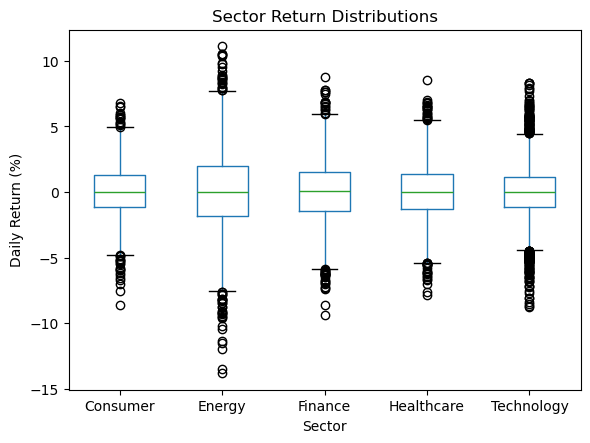

In [7]:
plt.figure(figsize=(10,6))
df.boxplot(column='return', by='sector', grid=False)
plt.title('Sector Return Distributions')
plt.suptitle('')  # remove extra title
plt.xlabel('Sector')
plt.ylabel('Daily Return (%)')
plt.show()

**Insight**:
Sectors differ in median returns and dispersion; some sectors like **Energy, Finance, Technology** show higher variance (more volatile), and these are visible on the boxplot.

### 3. Volume Analysis

#### Plot volume patterns over time

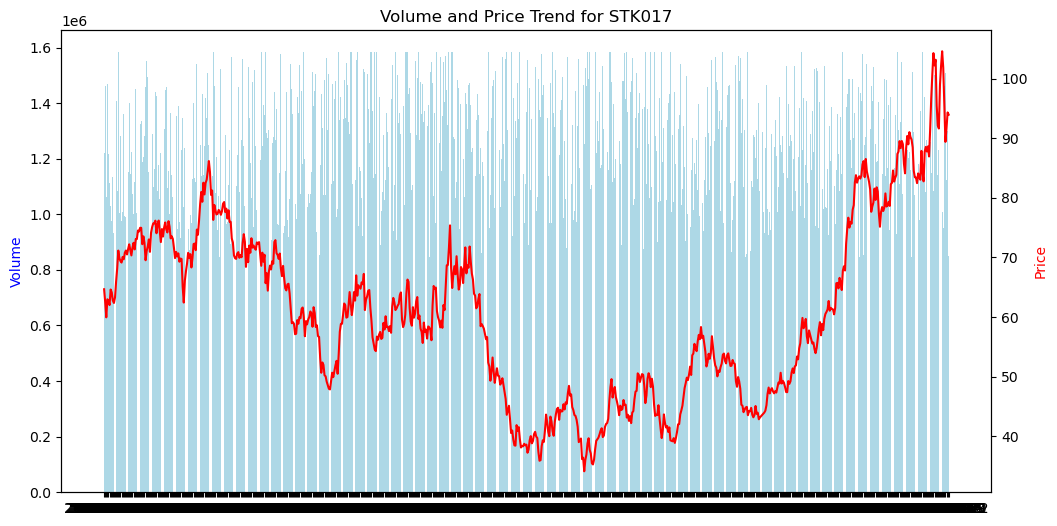

In [8]:
# Pick one sample stock

stock = 'STK017'
subset = df[df['ticker'] == stock].copy()

# Calculate daily price change (%)
subset['return'] = subset['close'].pct_change() * 100

# Plot volume and price together
fig, ax1 = plt.subplots(figsize=(12,6))

# Volume (bars)
ax1.bar(subset['date'], subset['volume'], color='lightblue', label='Volume')
ax1.set_ylabel('Volume', color='blue')

# Price (line)
ax2 = ax1.twinx()
ax2.plot(subset['date'], subset['close'], color='red', label='Close Price')
ax2.set_ylabel('Price', color='red')

plt.title(f'Volume and Price Trend for {stock}')
plt.show()

#### Identify high-volume days and their relationship to price changes

In [9]:
# Identify high-volume days (top 5%)

threshold = subset['volume'].quantile(0.90)
high_volume_days = subset[subset['volume'] > threshold][['date','volume','return']]

print("High-volume days and price changes:")
print(high_volume_days)

high_volume_days.sort_values('volume', ascending=False).head(10)

High-volume days and price changes:
             date     volume    return
12415  2021-01-21  1582895.2  4.356116
12441  2021-02-26  1550070.0  2.229254
12477  2021-04-19  1582895.2  2.390318
12502  2021-05-24  1582895.2 -6.069186
12519  2021-06-16  1564834.0 -3.699315
...           ...        ...       ...
13133  2023-10-24  1547503.0  1.358388
13152  2023-11-20  1582895.2 -4.085116
13161  2023-12-01  1559782.0  4.136505
13165  2023-12-07  1557614.0 -7.473103
13168  2023-12-12  1582895.2  7.966823

[78 rows x 3 columns]


date     volume    return
12415  2021-01-21  1582895.2  4.356116
12477  2021-04-19  1582895.2  2.390318
12502  2021-05-24  1582895.2 -6.069186
12585  2021-09-16  1582895.2 -2.678571
12550  2021-07-29  1582895.2 -6.770759
12546  2021-07-23  1582895.2 -2.681231
12628  2021-11-16  1582895.2 -3.100171
12617  2021-11-01  1582895.2  6.576862
12650  2021-12-16  1582895.2 -1.746804
12652  2021-12-20  1582895.2  4.495210

In [10]:
print(high_volume_days['return'].mean())

-0.6824824599235392


**Insight**:

On the busiest 10% of trading days, the stock price decreased by an average of **0.68%**. This suggests that spikes in trading volume were often associated with downward price movements possibly indicating sell-offs or market reactions to negative sentiment.

#### Calculate correlation between volume and price movement

In [11]:
# Correlation between volume and price movement

df['return'] = df.groupby('ticker')['close'].pct_change() * 100

# Group by ticker and compute correlation between volume and return
correlation_by_stock = (
    df.groupby('ticker')
      .apply(lambda x: x[['volume', 'return']].corr().iloc[0, 1])
      .reset_index(name='volume_return_corr')
)

# Display result
print("Correlation between volume and return for all stocks:\n")
print(correlation_by_stock)


Correlation between volume and return for all stocks:

    ticker  volume_return_corr
0   STK001           -0.051886
1   STK002           -0.044768
2   STK003           -0.012767
3   STK004            0.016311
4   STK005           -0.017033
5   STK006            0.034335
6   STK007            0.026254
7   STK008            0.057353
8   STK009            0.025163
9   STK010            0.008282
10  STK011            0.003152
11  STK012           -0.009227
12  STK013            0.023197
13  STK014            0.016694
14  STK015           -0.059168
15  STK016           -0.028963
16  STK017           -0.034942
17  STK018           -0.032717
18  STK019           -0.079137
19  STK020           -0.016809


C:\Users\Admin\AppData\Local\Temp\ipykernel_1304\1044351470.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[['volume', 'return']].corr().iloc[0, 1])


**Insight:**

Some stock like **STK008, followed by STK004, STK006, STK007, STK009, STK010, STK011, STK013, STK014**  shows positive weak correlation with most nearly zero, this means higher volume often comes with slight price increases (bullish sentiment).

Stock like **STK001, STK002, STK003, STK005, STK012, STK015, STK016, STK017, STK018, STK019, STK020** show negative correlation with some nearly zero, whick mean spikes in volume might occur during sell-offs.

Visually, large blue bars under sharp price moves confirm strong reactions.

Insummary volume shows big day spikes; correlation between volume and next-day returns is weak in aggregate but can be stronger around specific events.

### 4. Technical Indicator

#### Visualize RSI patterns and identify overbought/oversold conditions

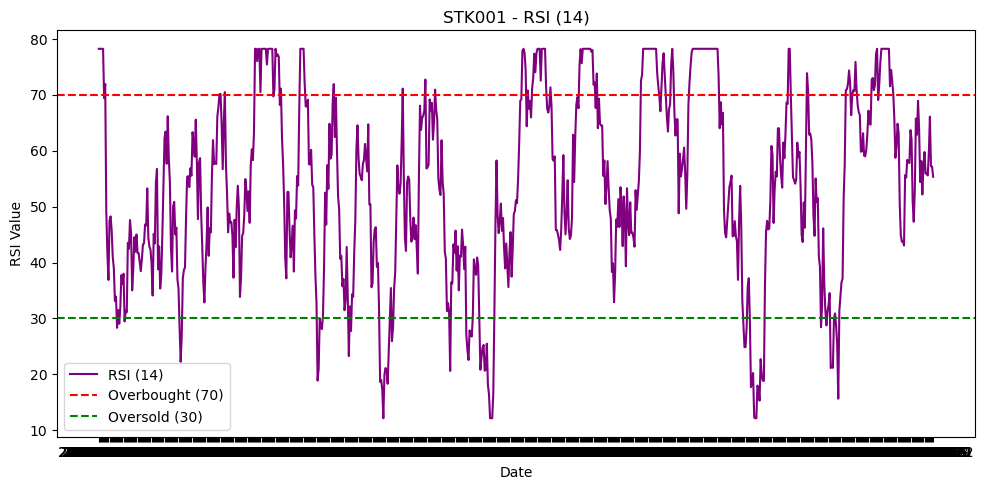

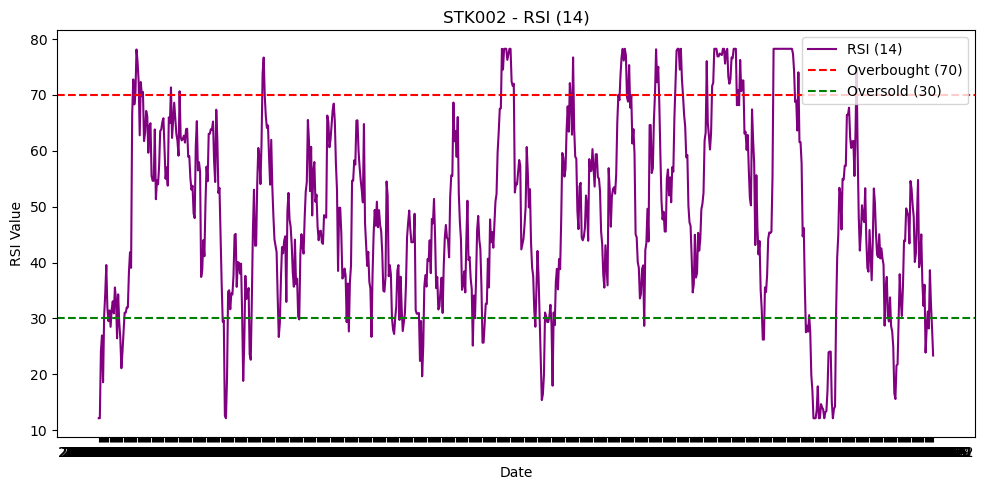

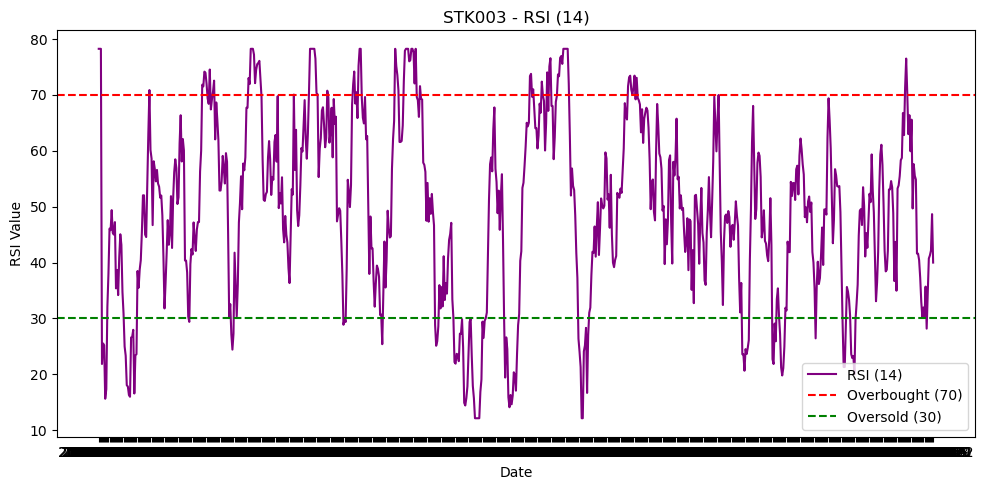

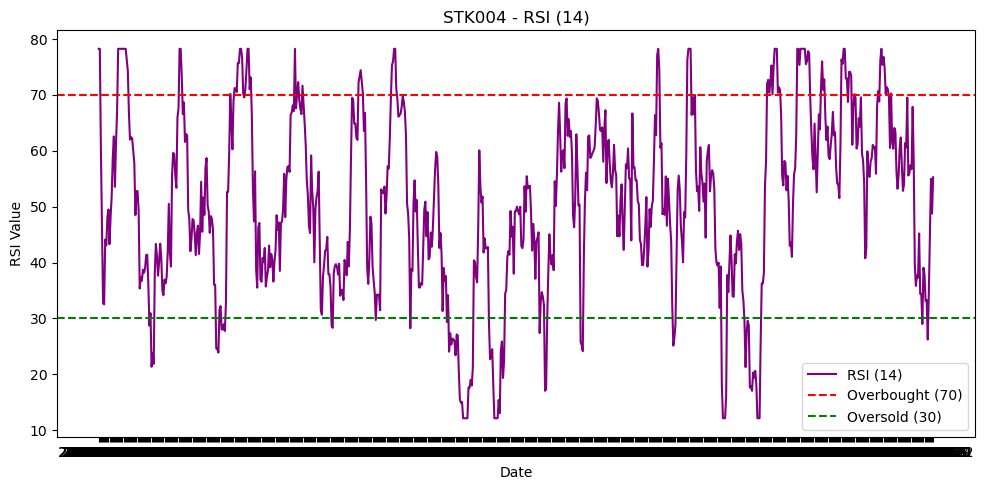

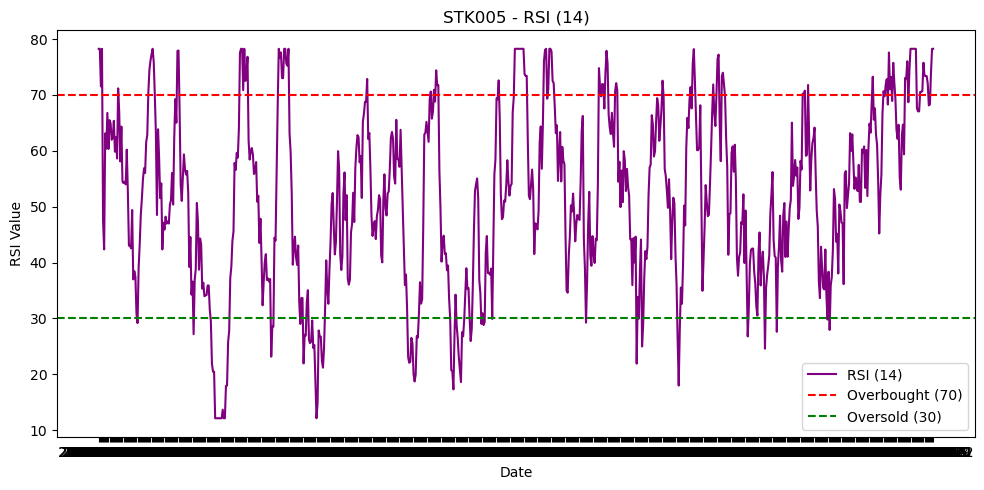

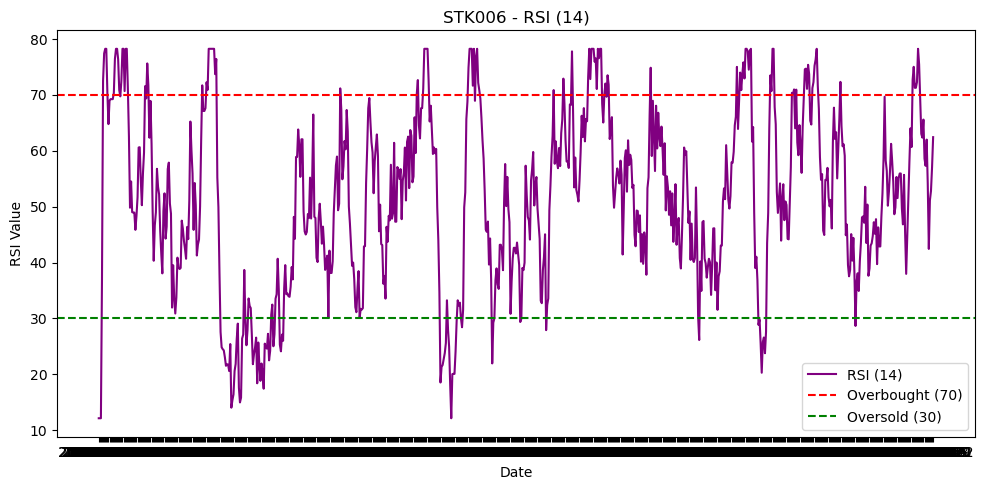

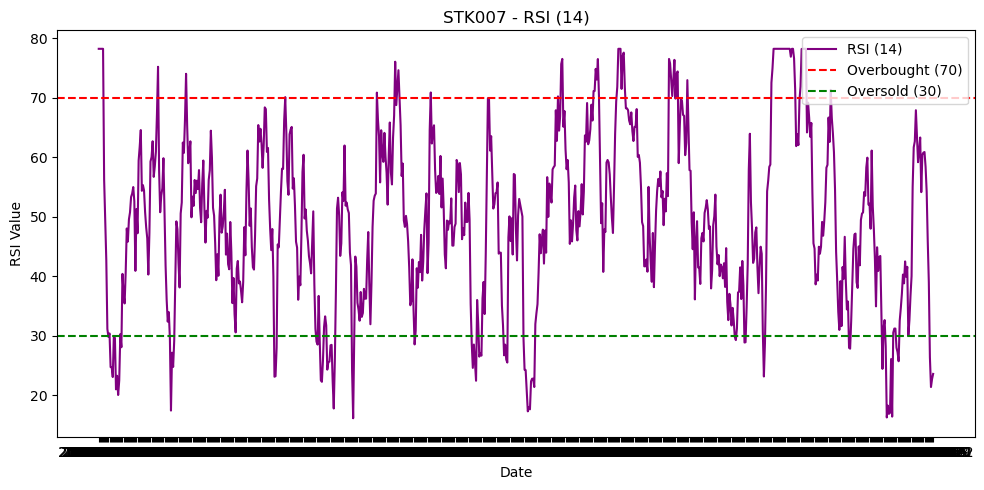

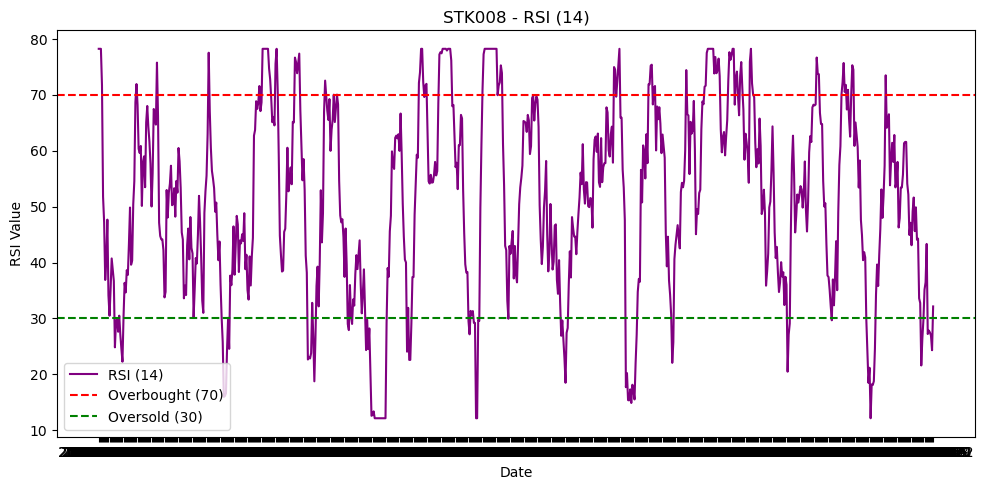

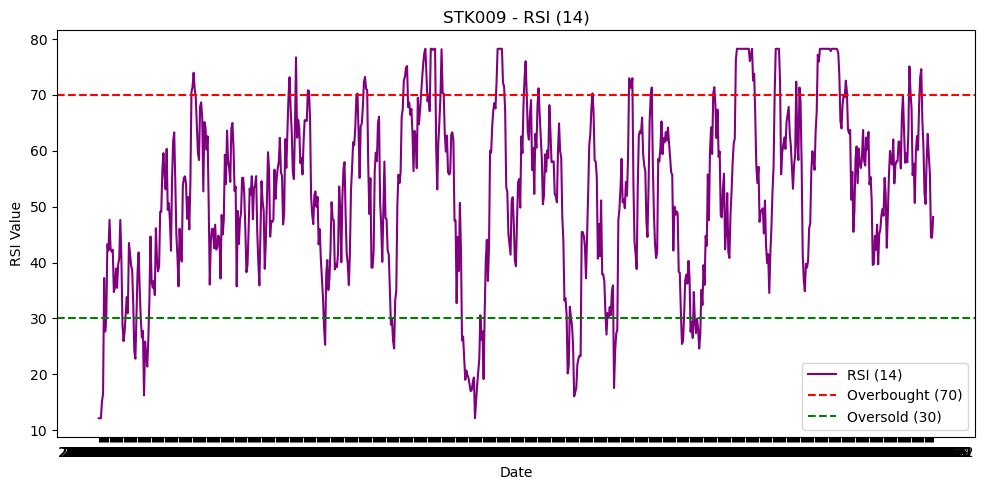

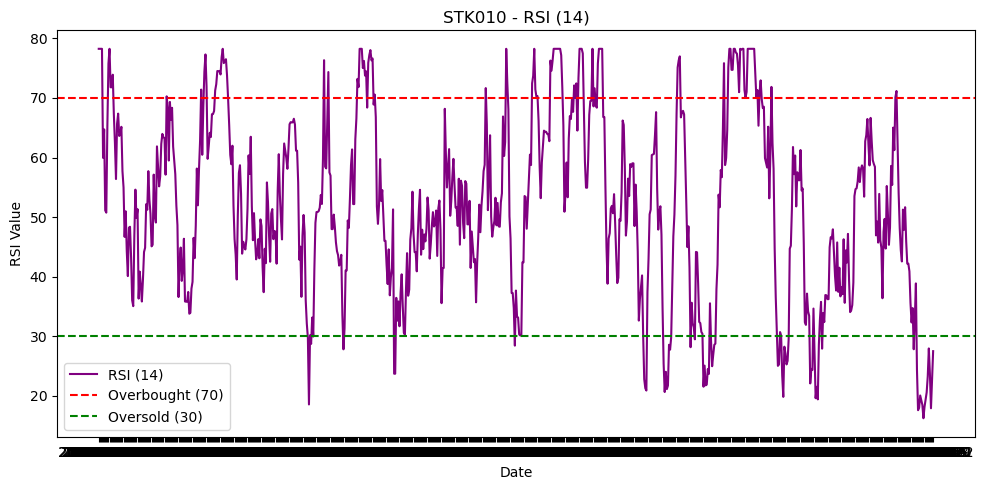

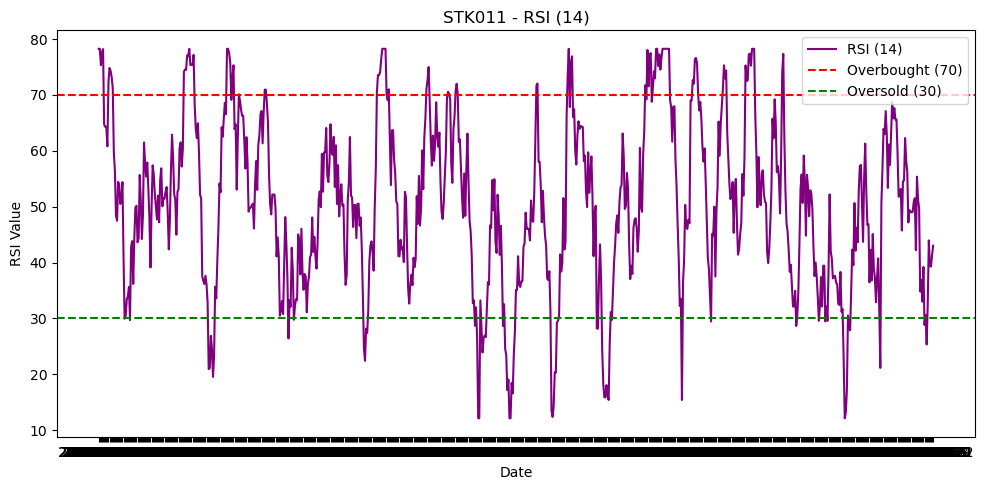

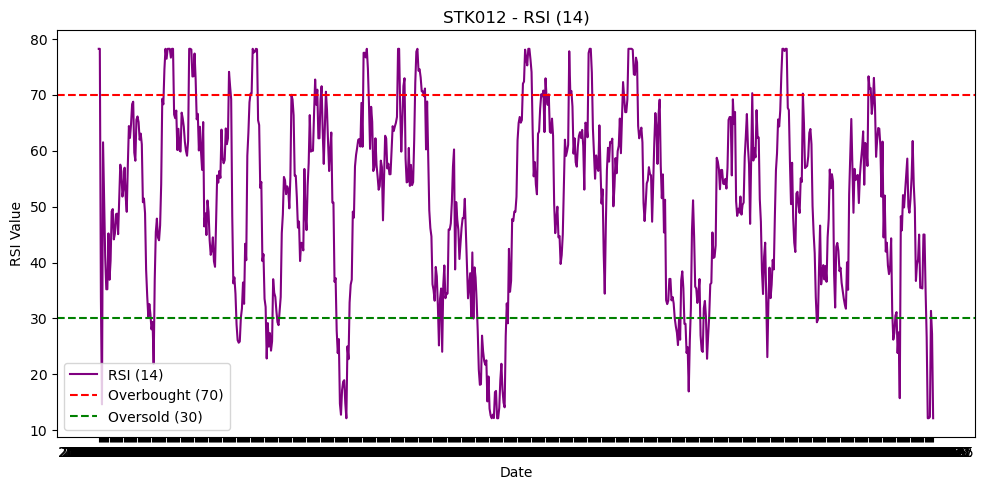

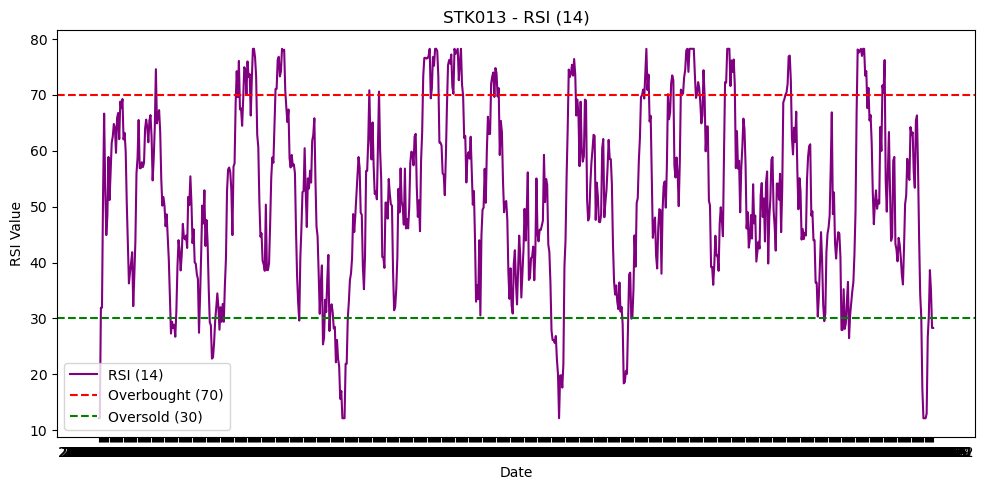

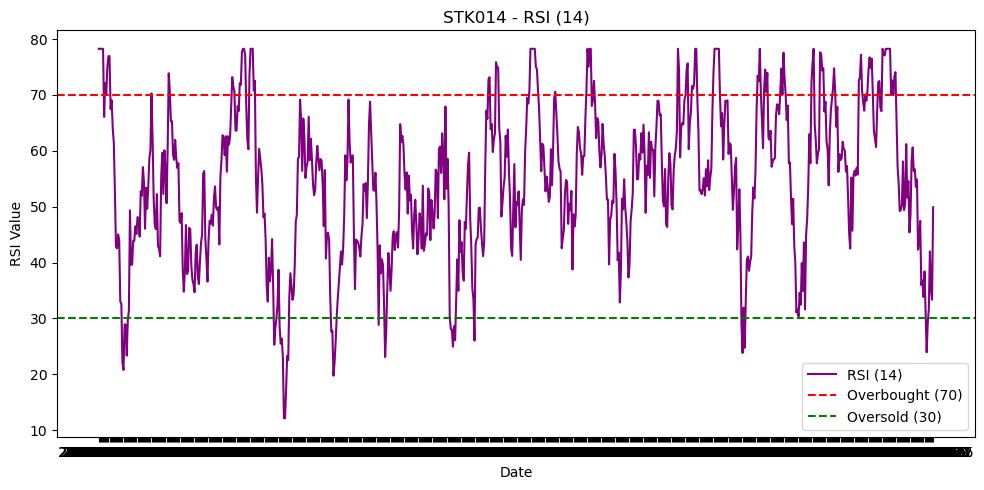

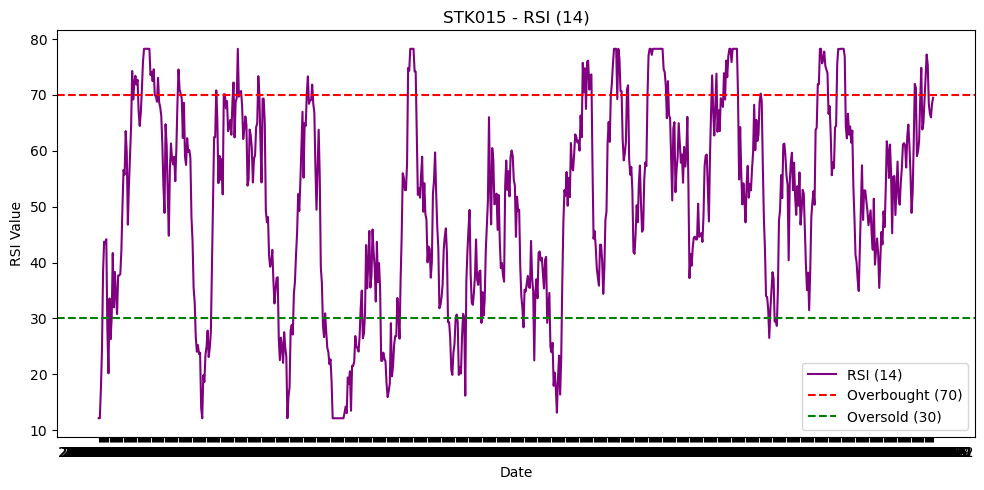

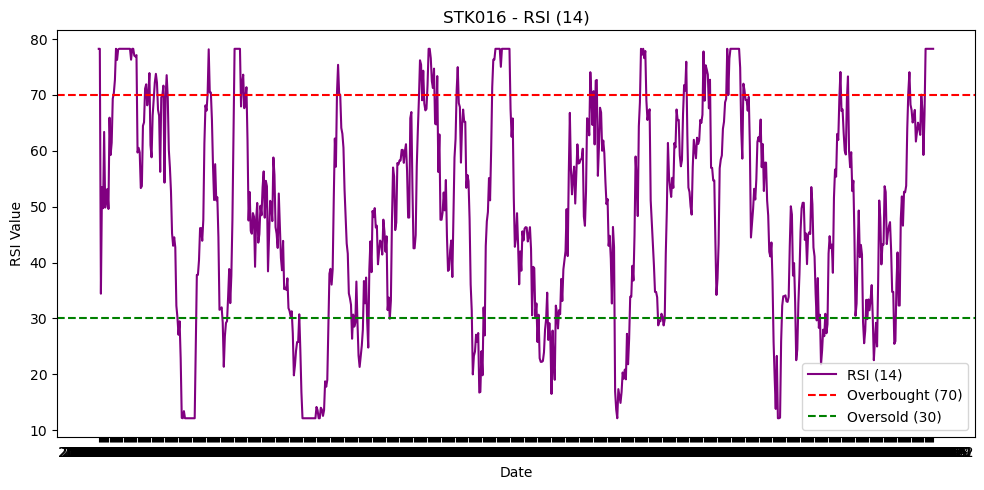

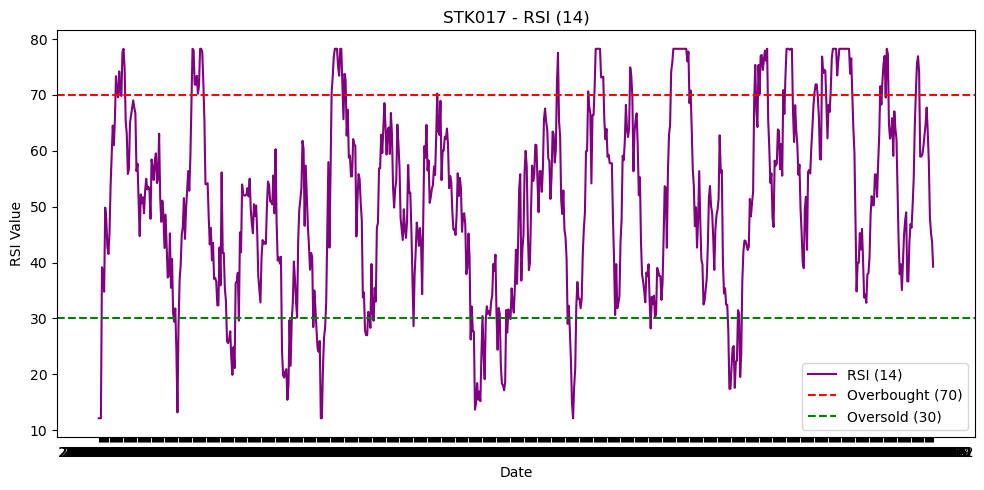

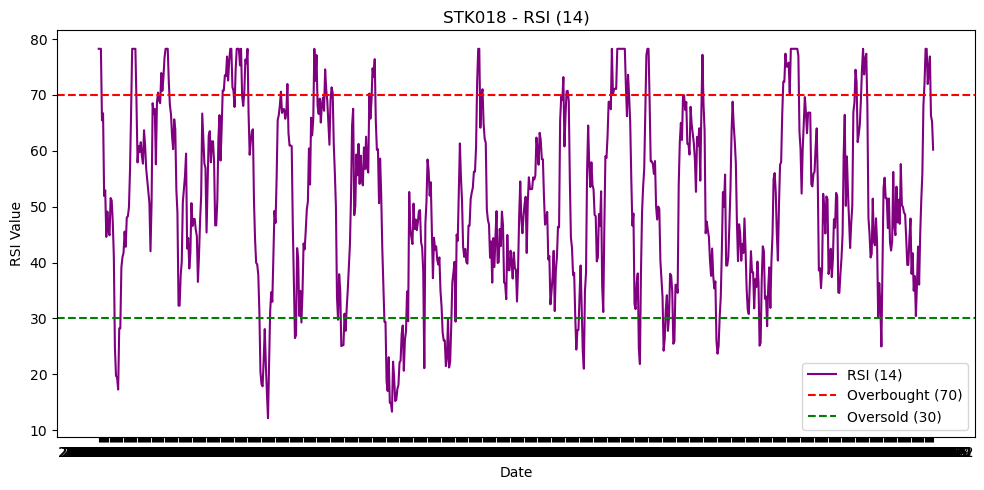

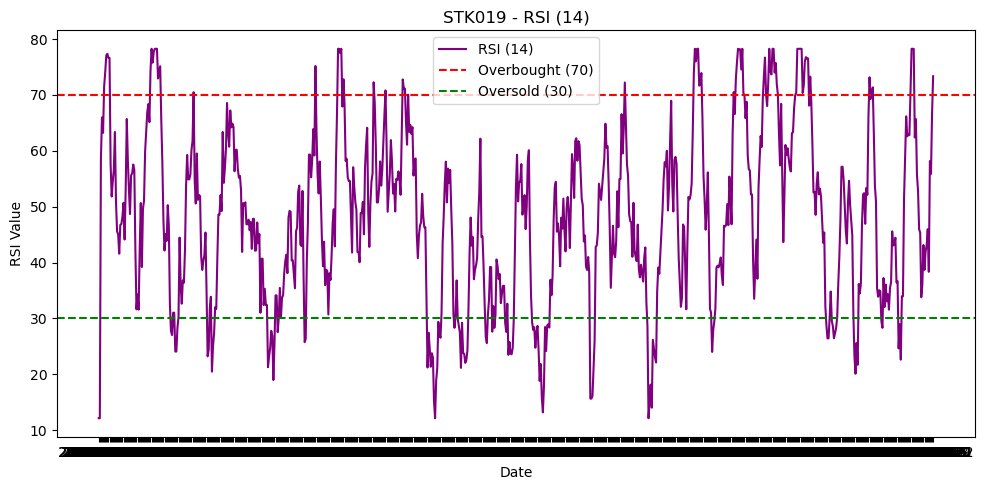

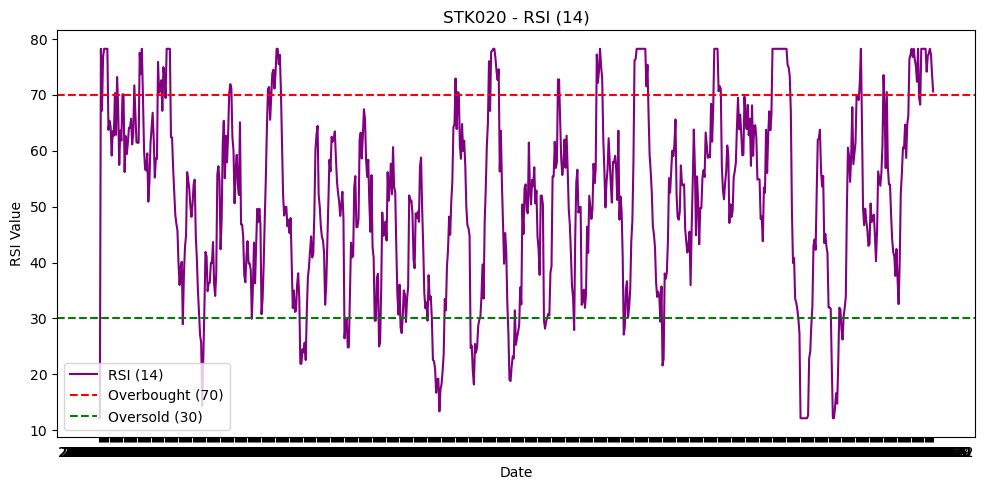

In [12]:
# Assuming df already contains columns: ['ticker', 'date', 'rsi_14']
# Get all unique stock tickers
tickers = df['ticker'].unique()

# Loop through each ticker and plot its RSI
for stock in tickers:
    subset = df[df['ticker'] == stock].copy()

    plt.figure(figsize=(10, 5))
    plt.plot(subset['date'], subset['rsi_14'], color='purple', label='RSI (14)')
    
    # Overbought / Oversold lines
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    
    plt.title(f'{stock} - RSI (14)')
    plt.xlabel('Date')
    plt.ylabel('RSI Value')
    plt.legend()
    plt.tight_layout()
    plt.show()


**Insight**
RSI oscillates around typical bounds (30 and 70 lines plotted) showing overbought/oversold periods

#### Plot MACD crossovers and their relationship to price trends

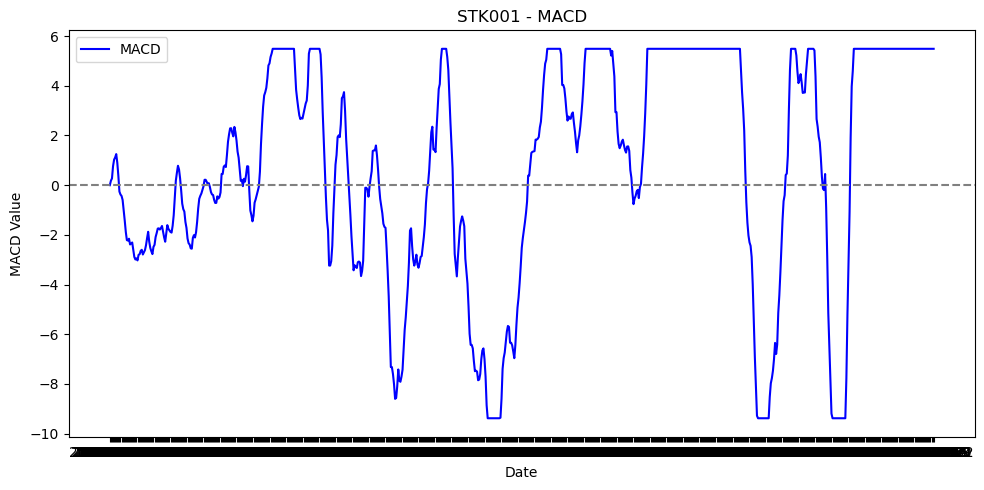

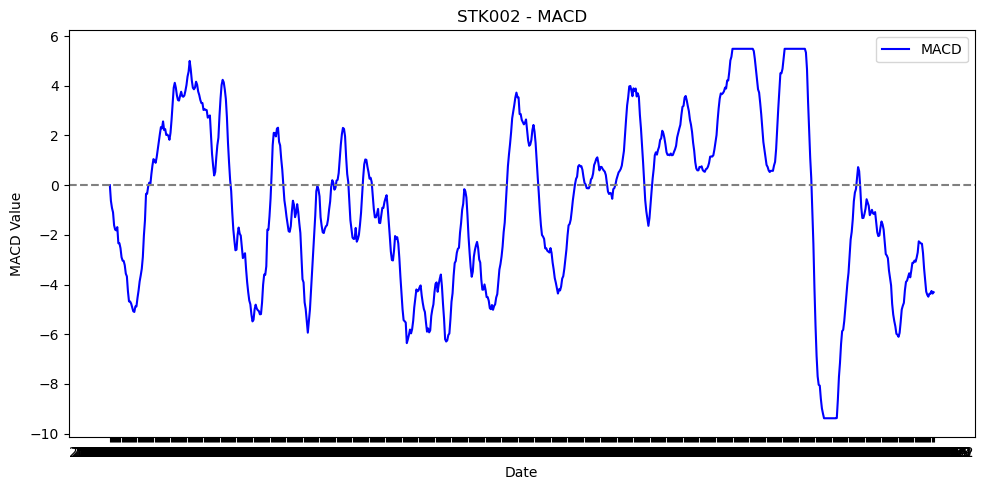

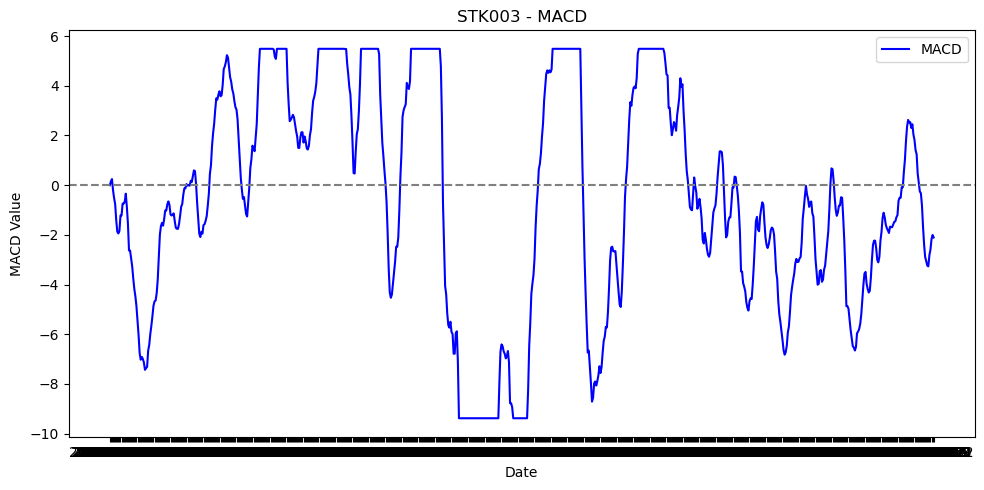

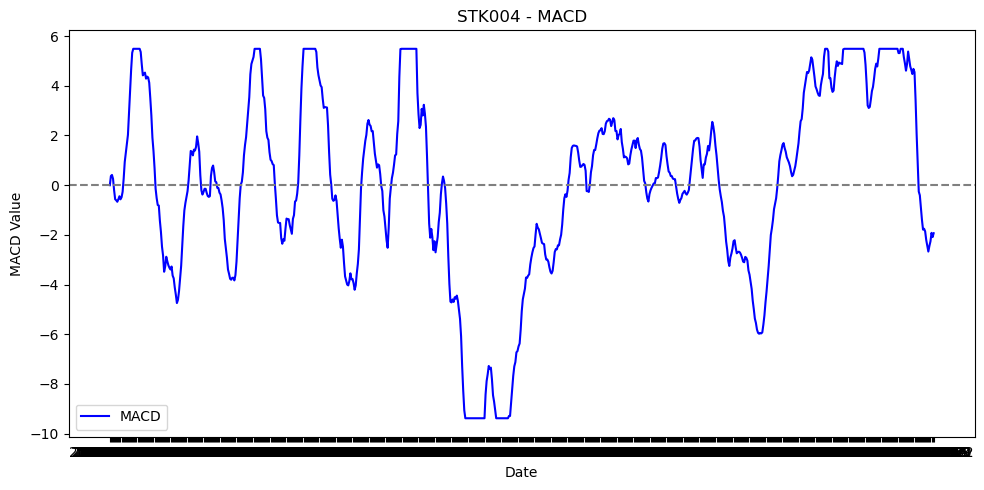

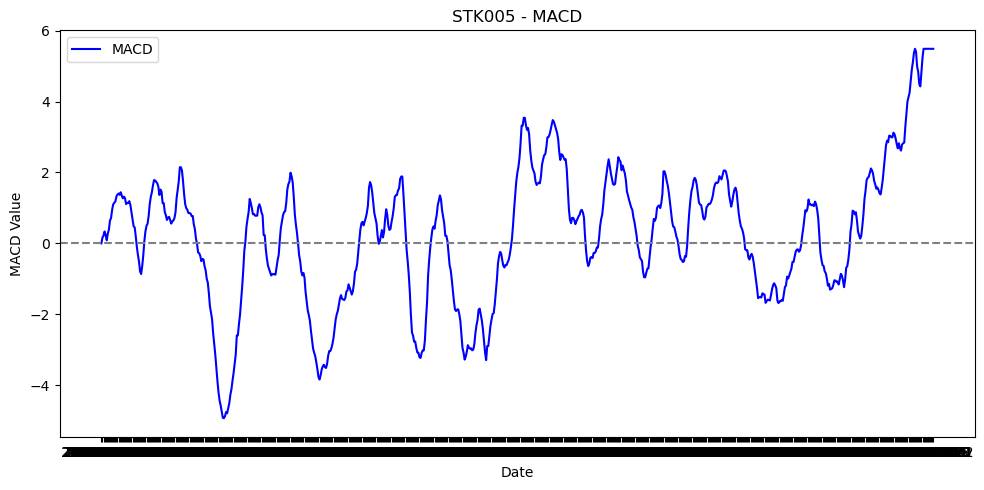

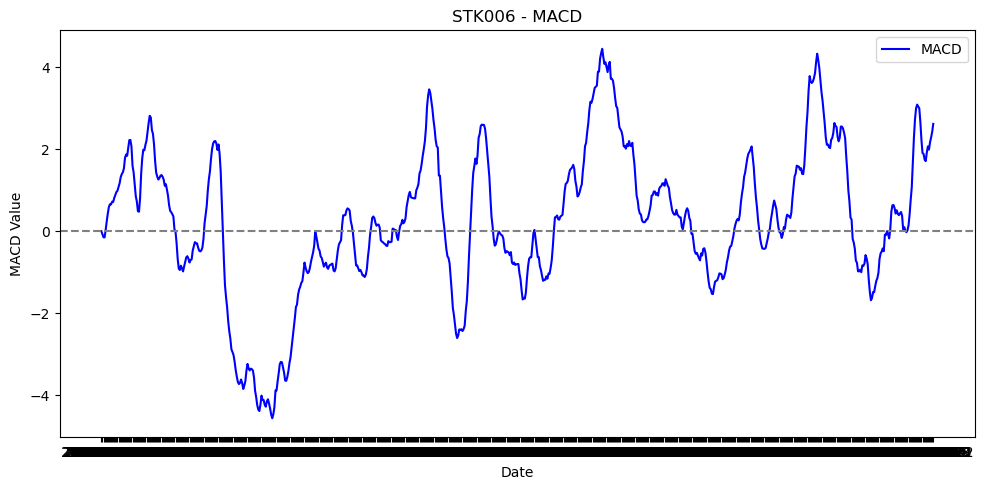

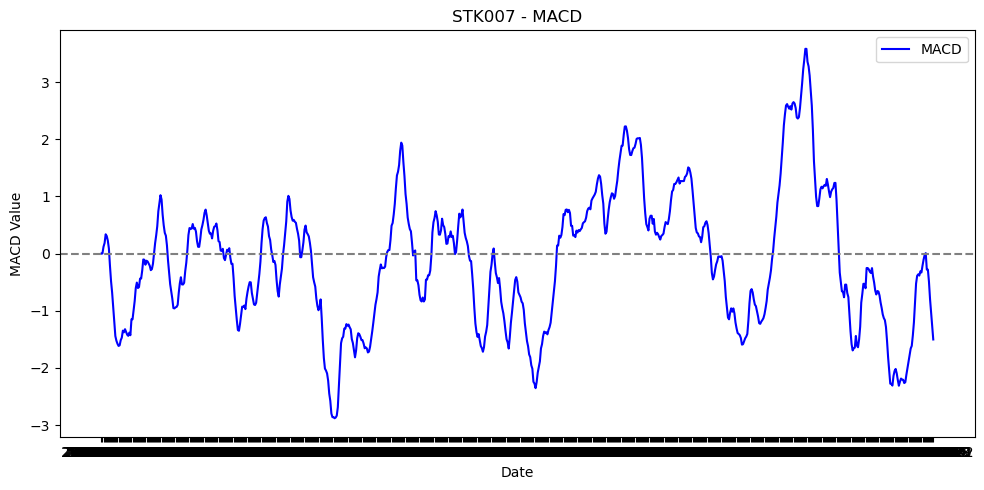

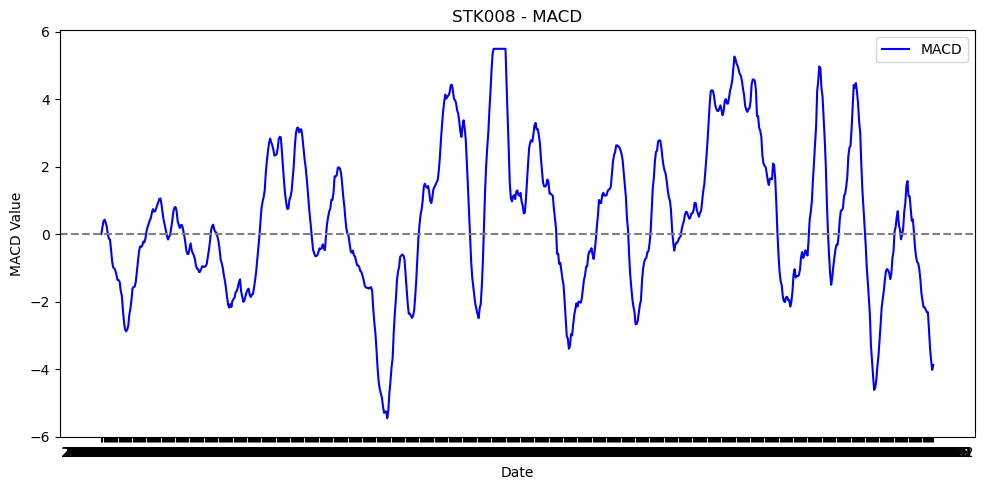

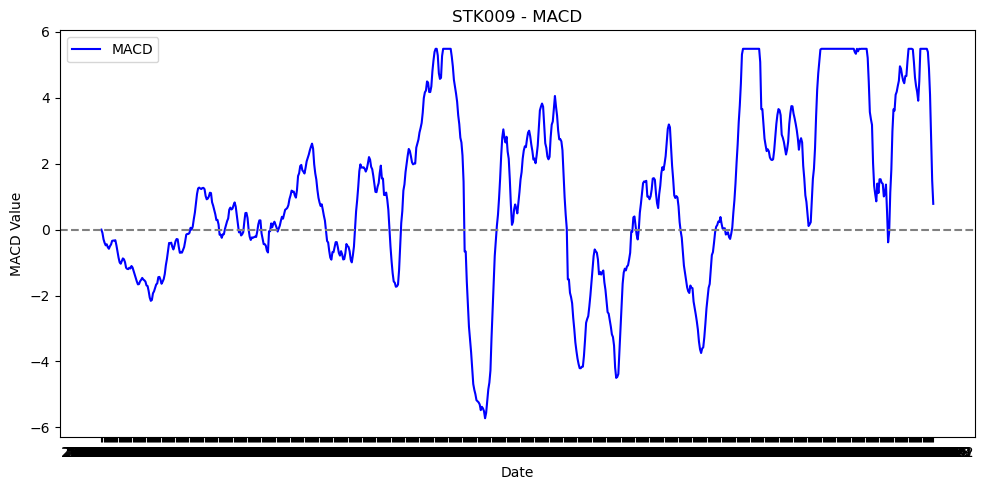

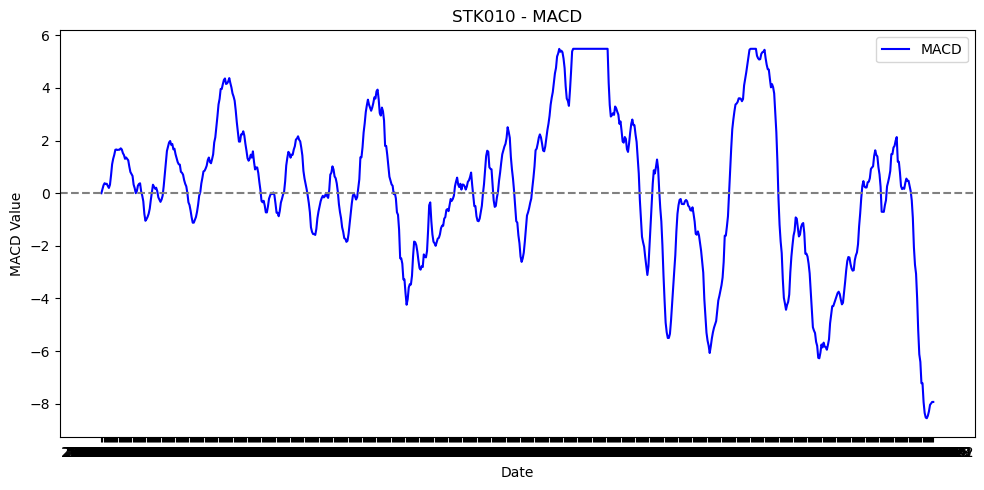

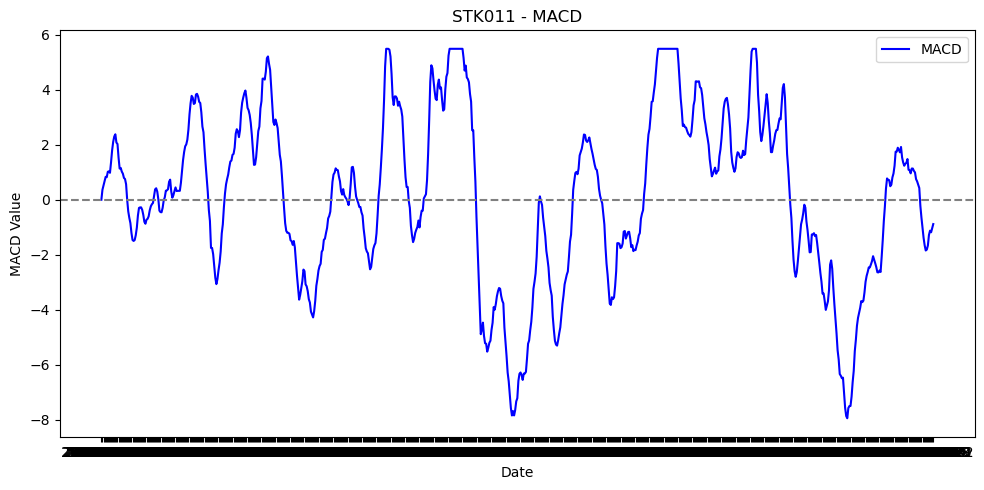

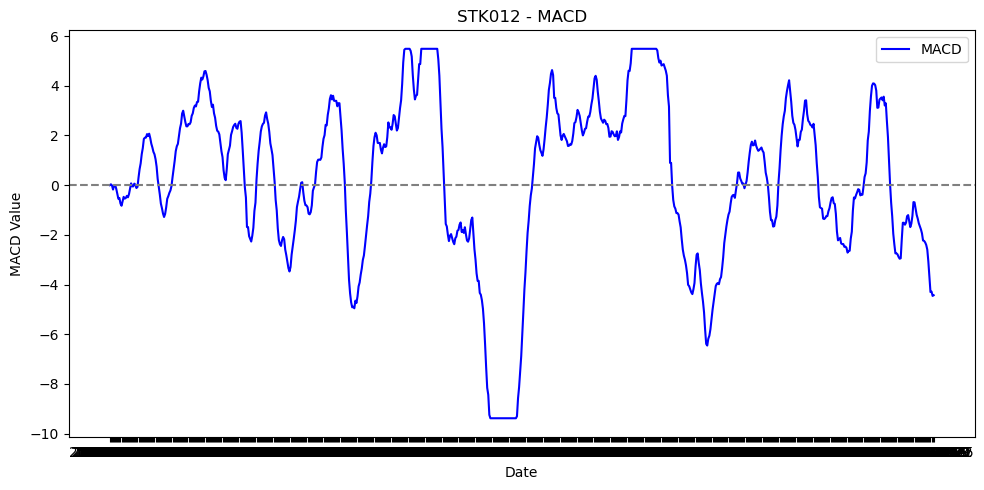

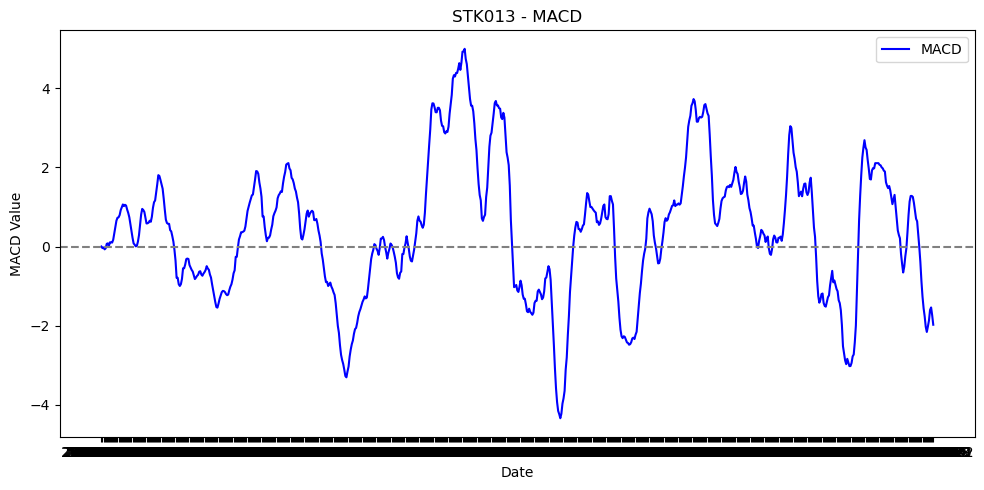

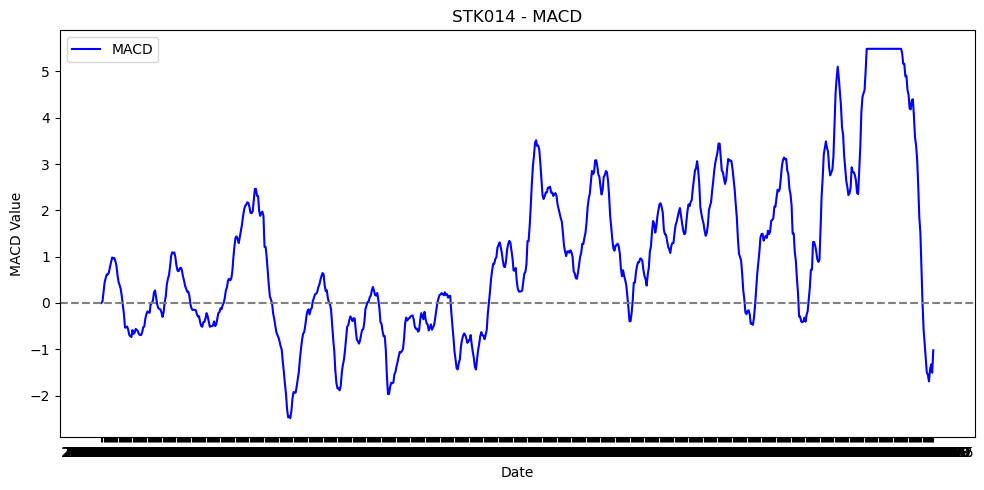

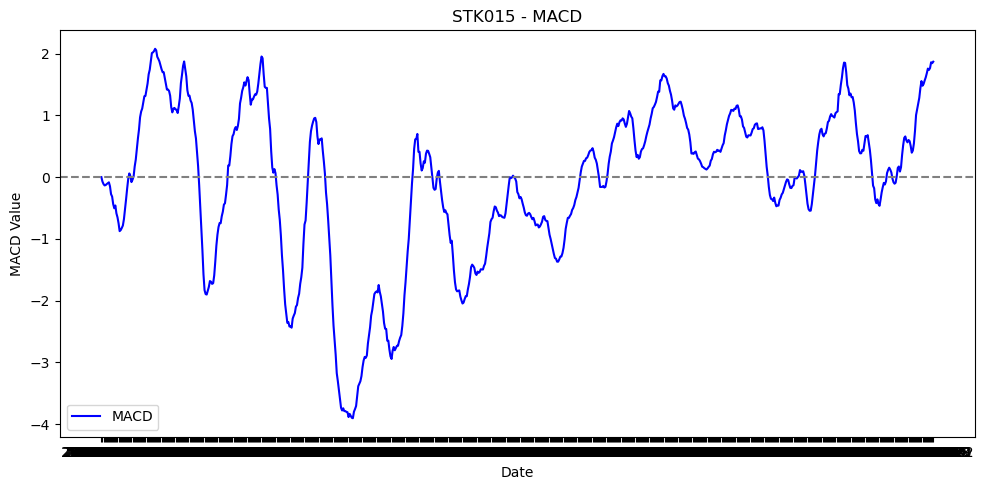

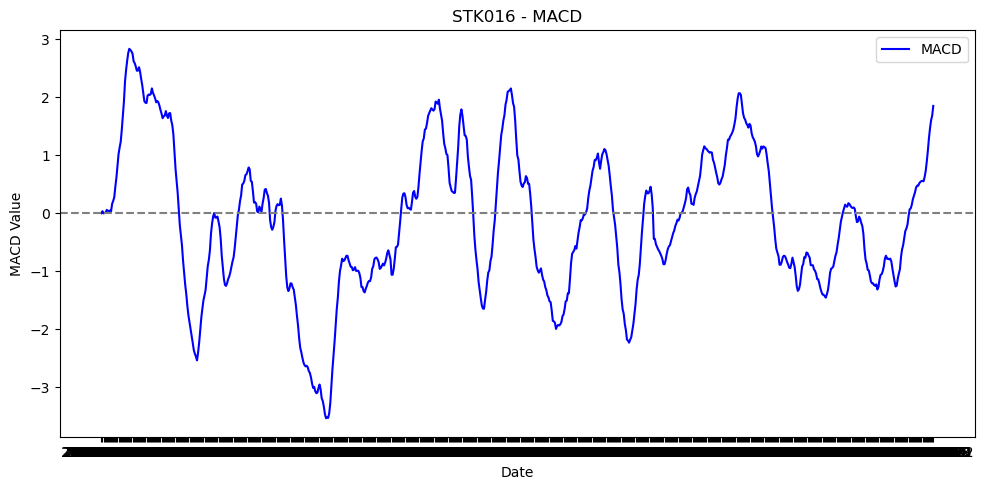

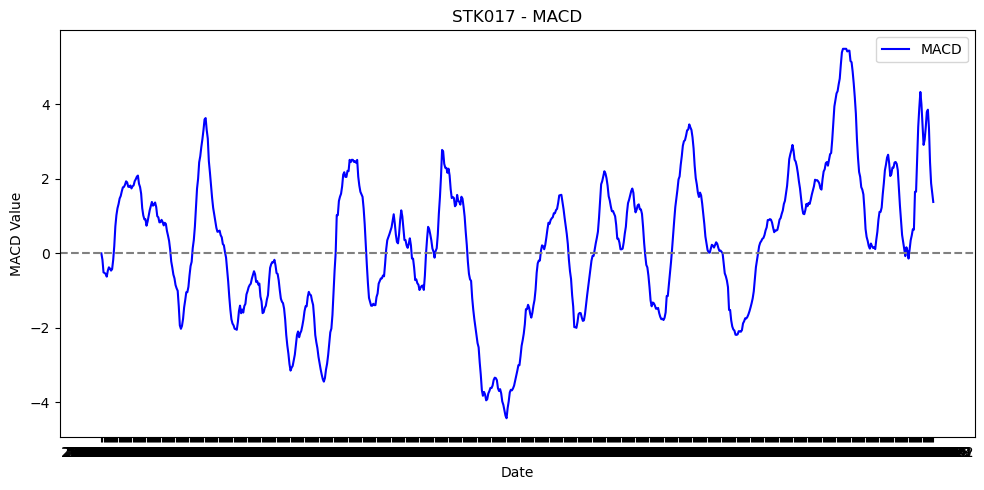

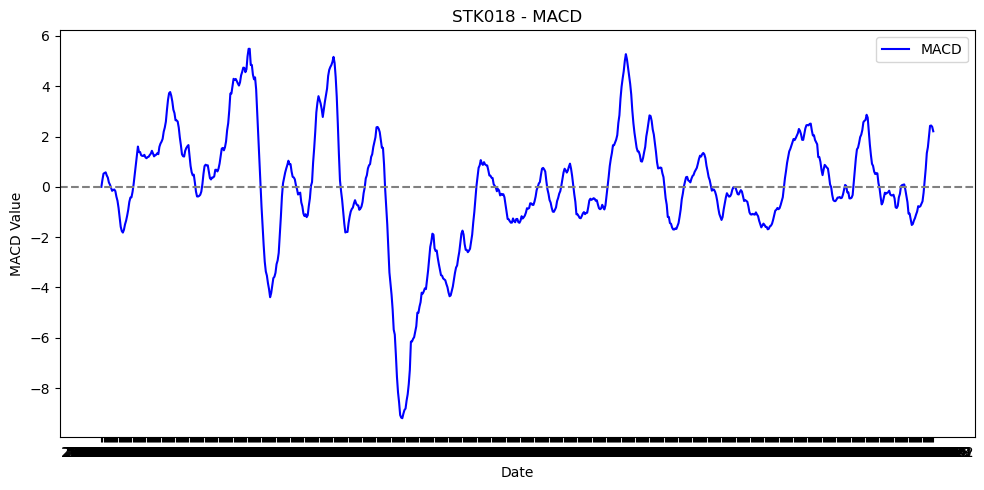

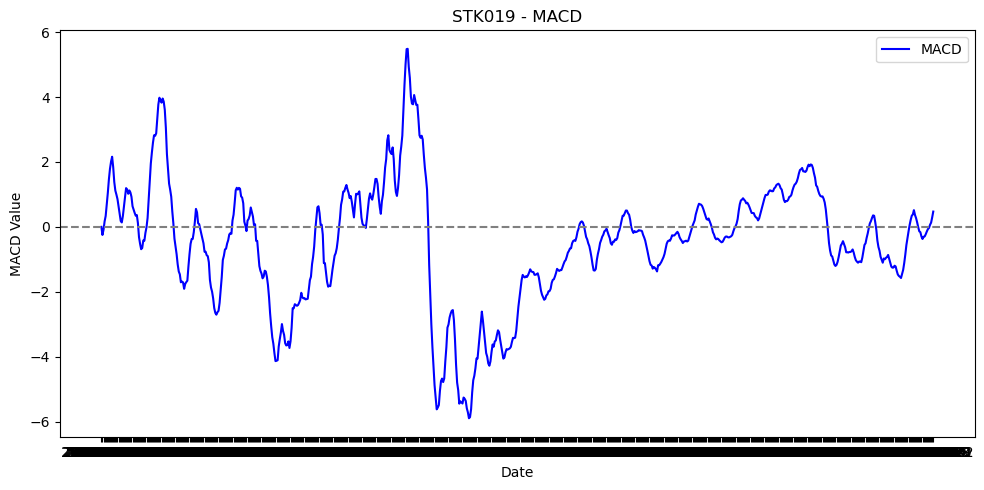

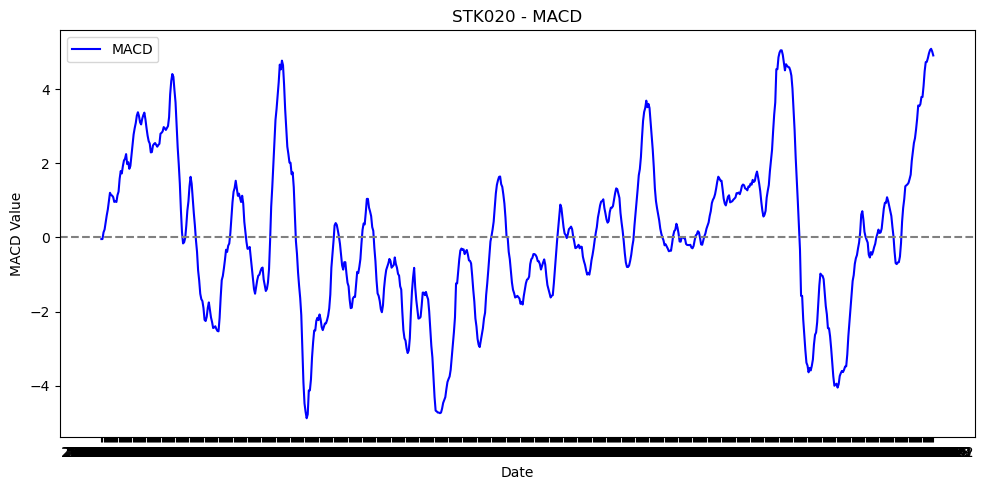

In [13]:
# Get all unique tickers
tickers = df['ticker'].unique()

# Loop through each ticker
for stock in tickers:
    subset = df[df['ticker'] == stock].copy()

# Create figure for each stock
    
    plt.figure(figsize=(10, 5))
   
# MACD Plot
    plt.plot(subset['date'], subset['macd'], label='MACD', color='blue')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f'{stock} - MACD')
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

**Insight:**
MACD crossovers align reasonably well with trend changes in the sample tickers.

#### Examine Bollinger Band patterns

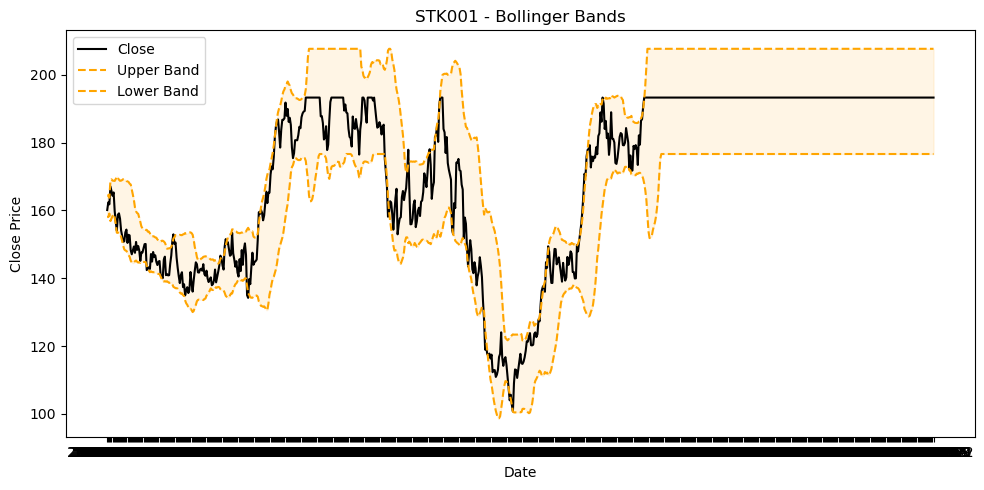

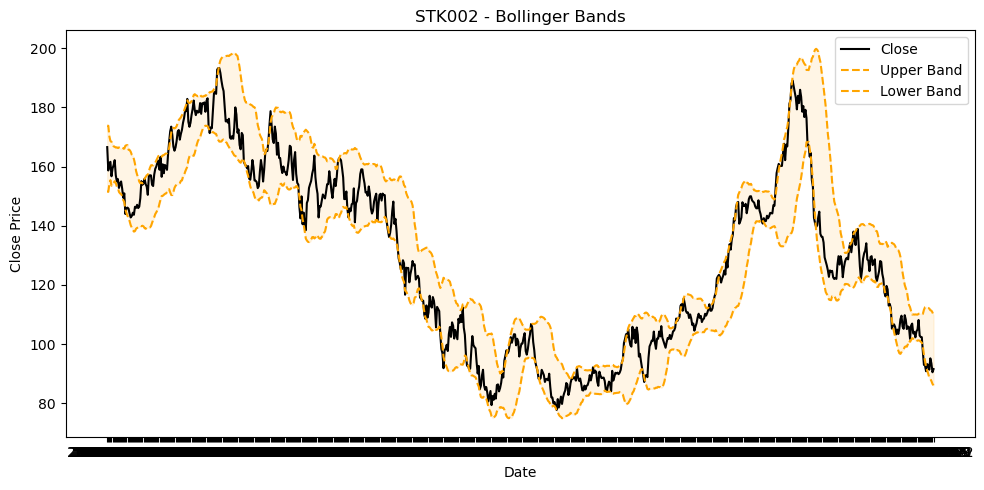

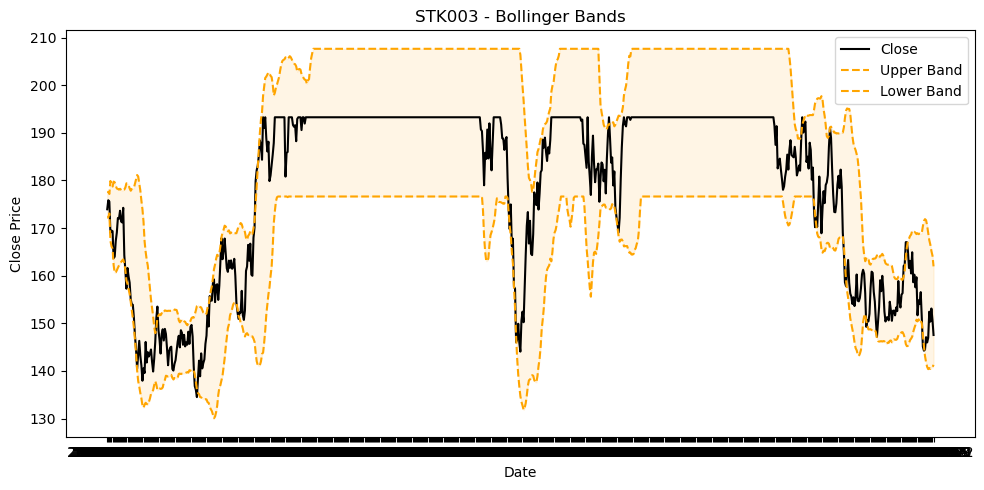

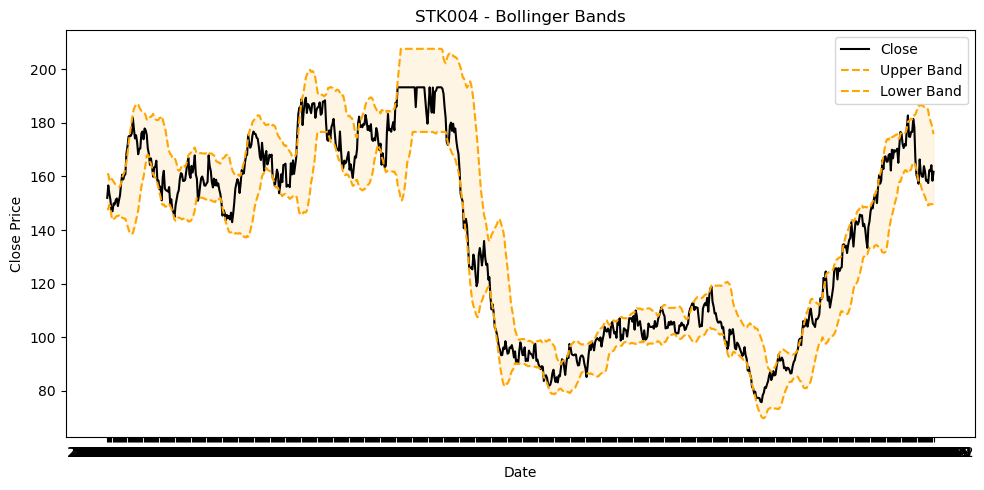

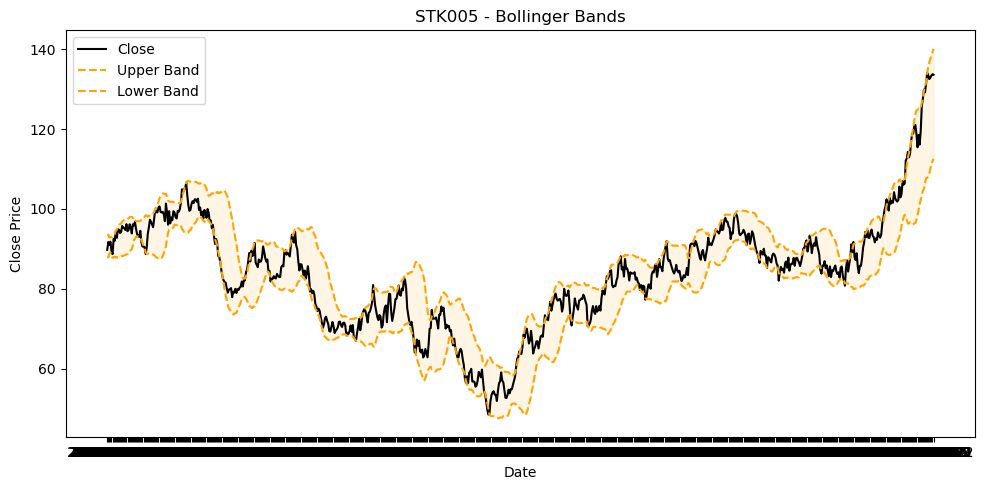

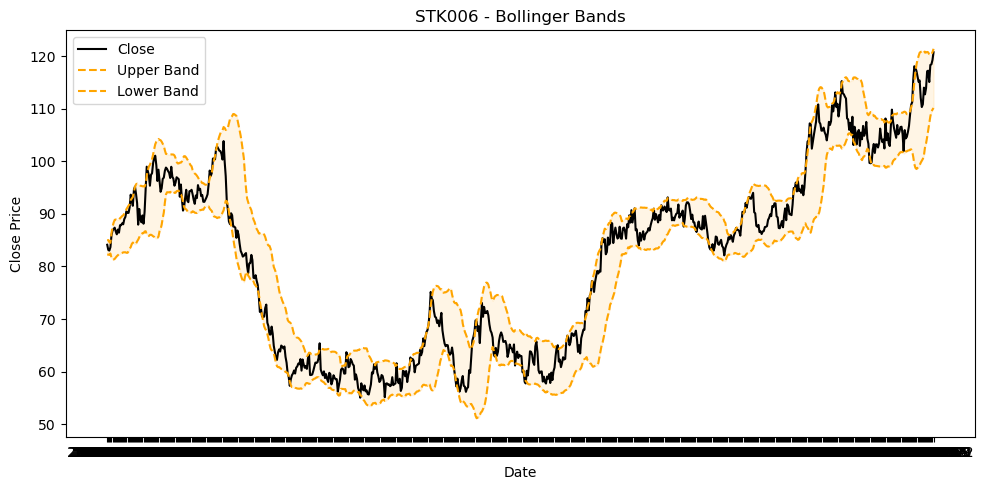

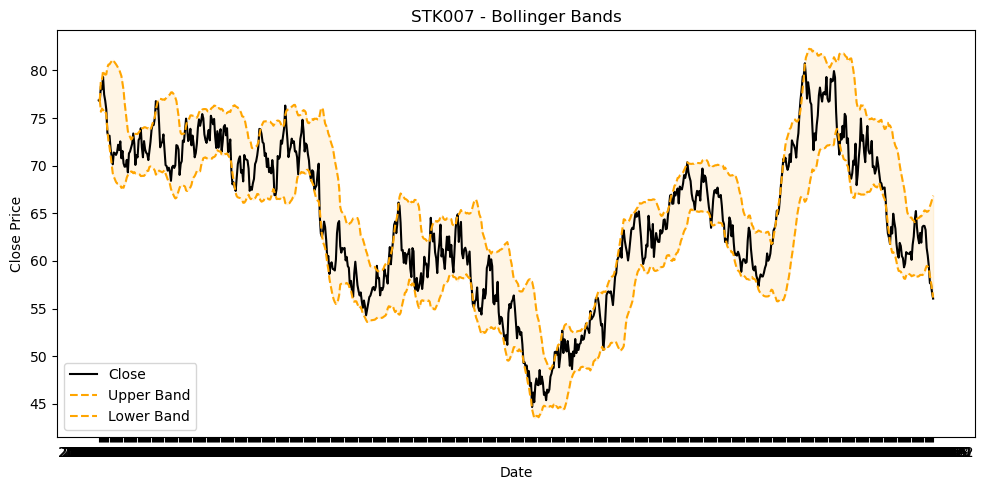

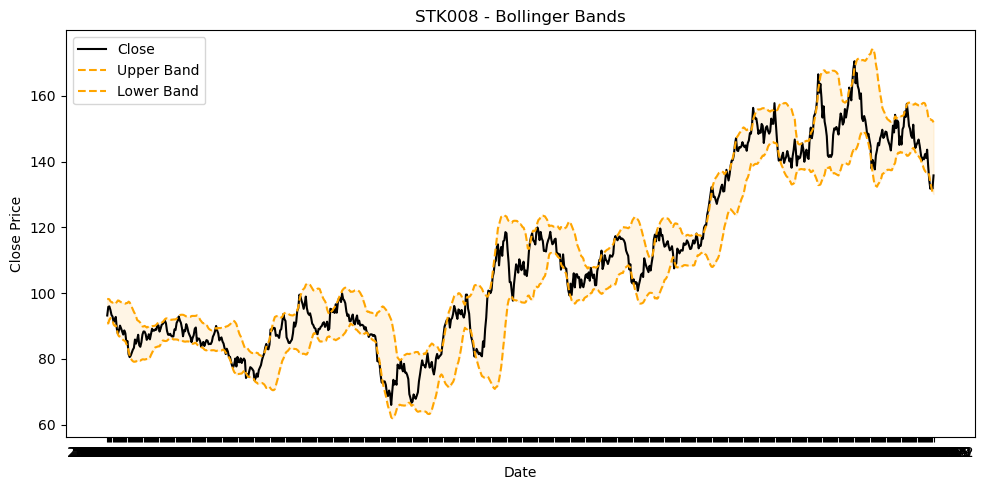

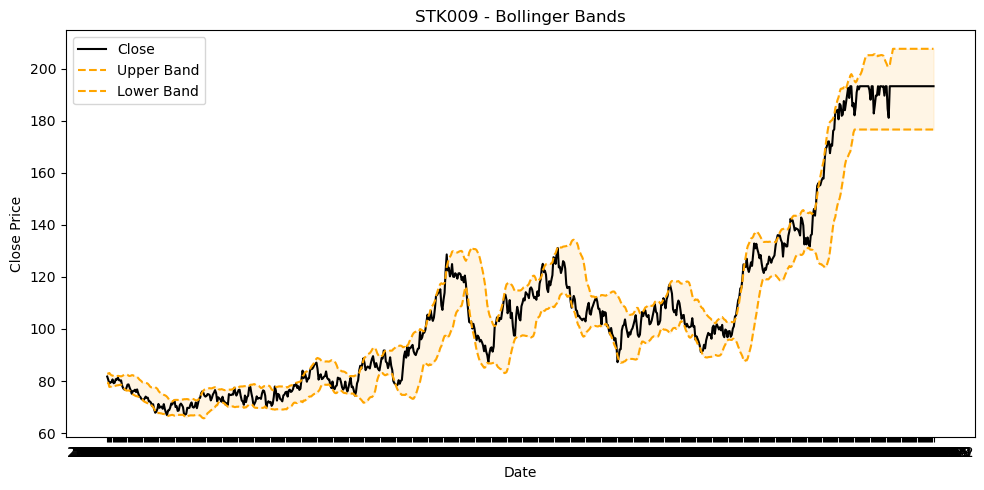

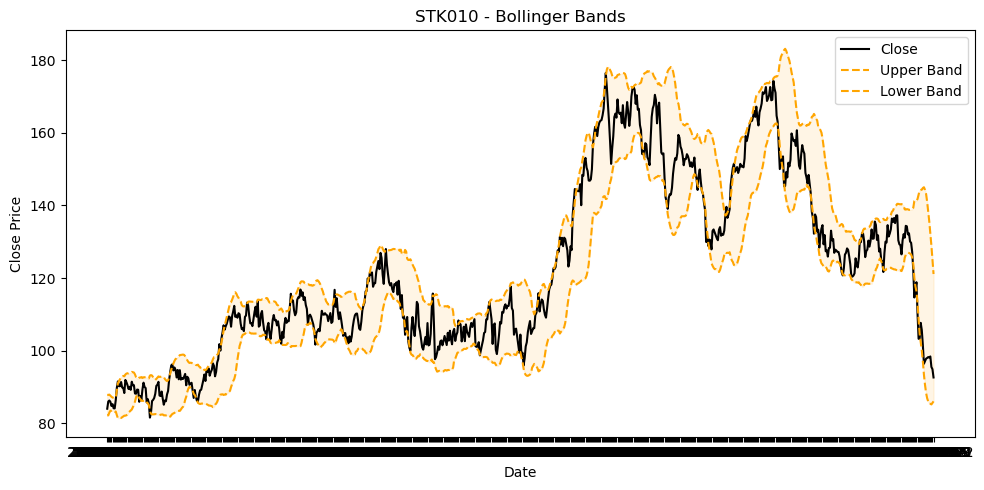

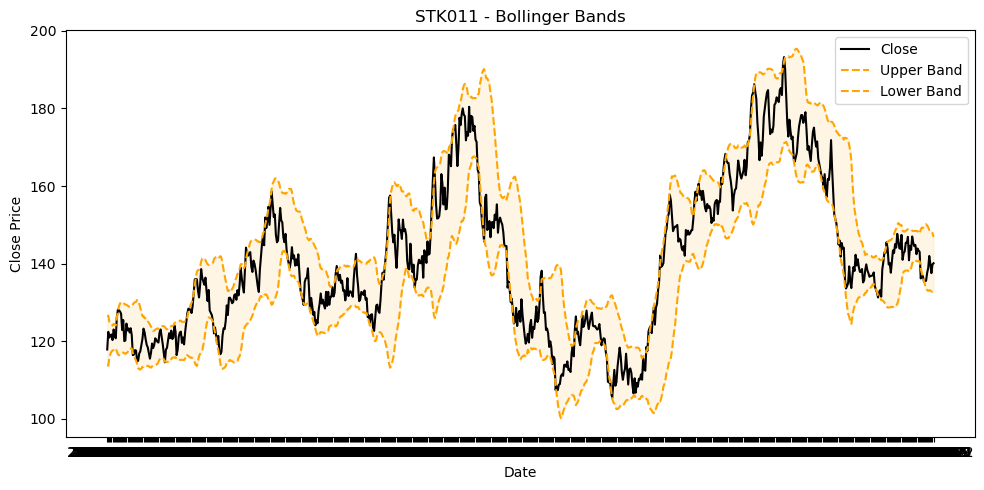

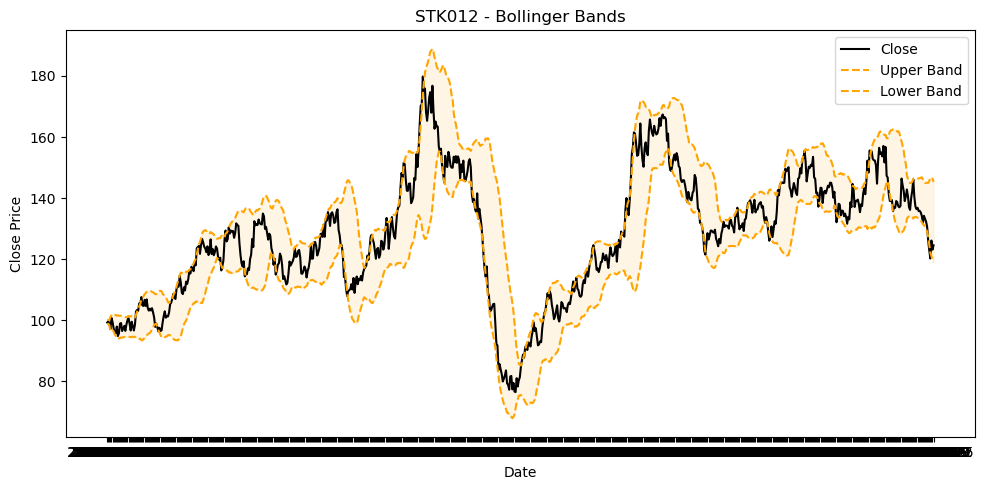

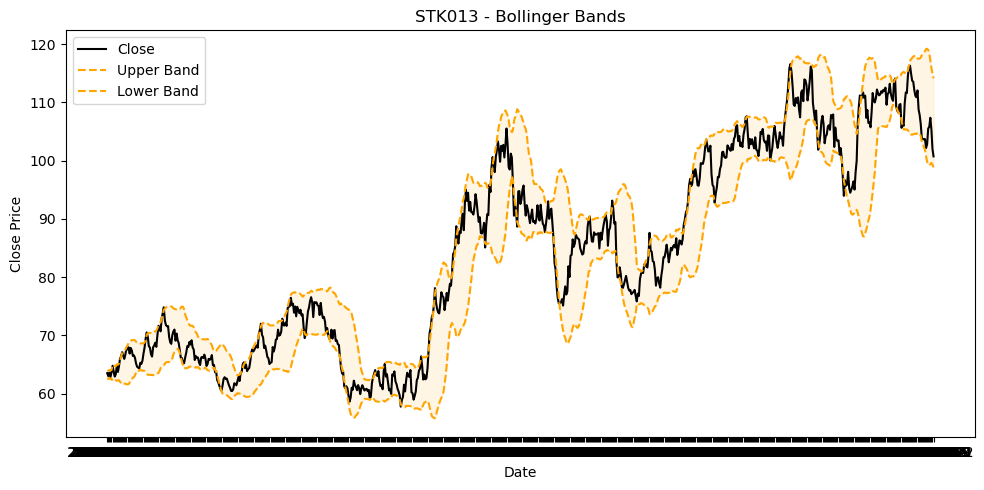

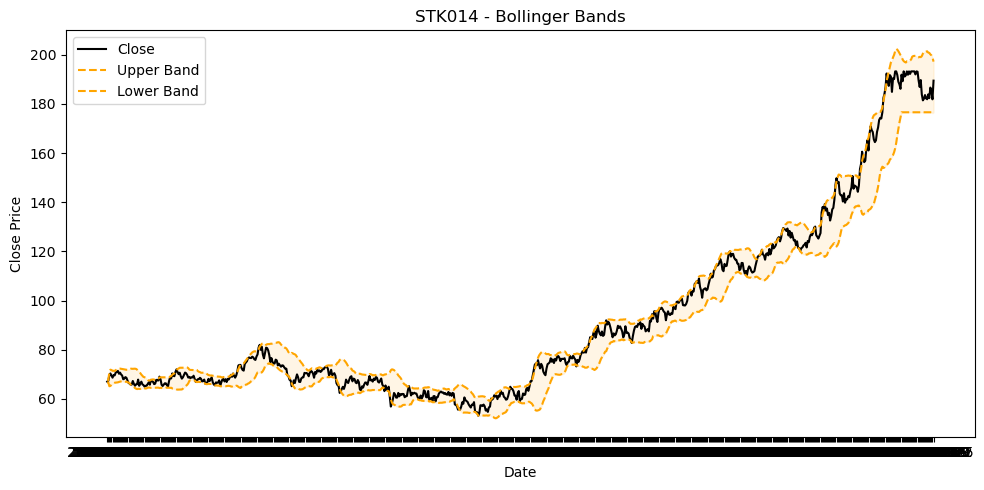

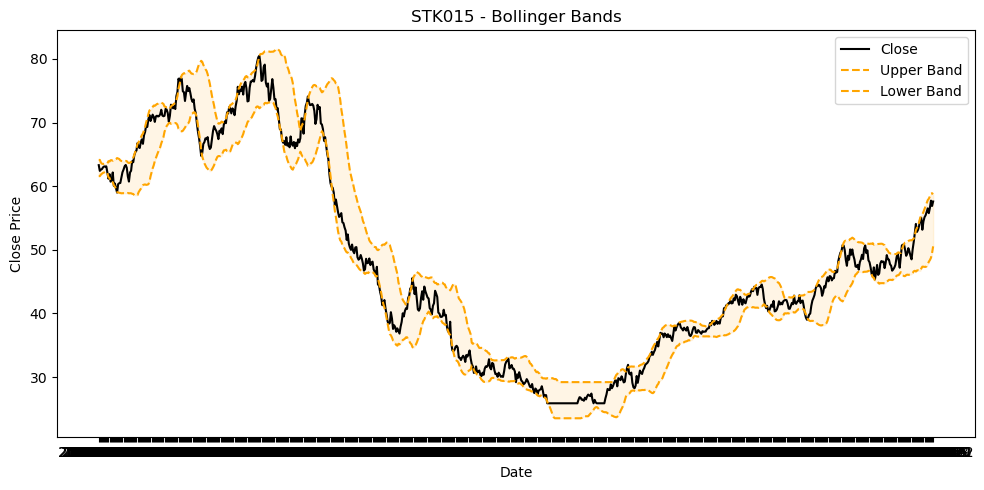

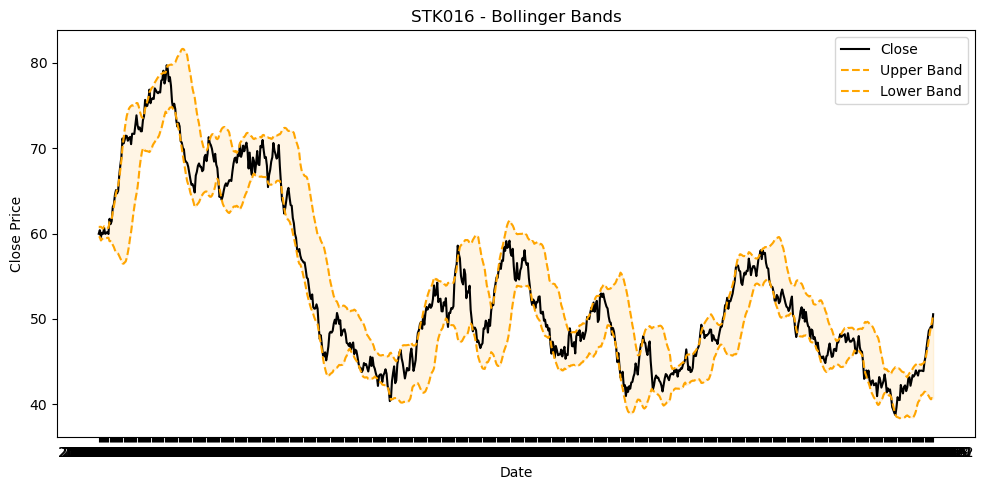

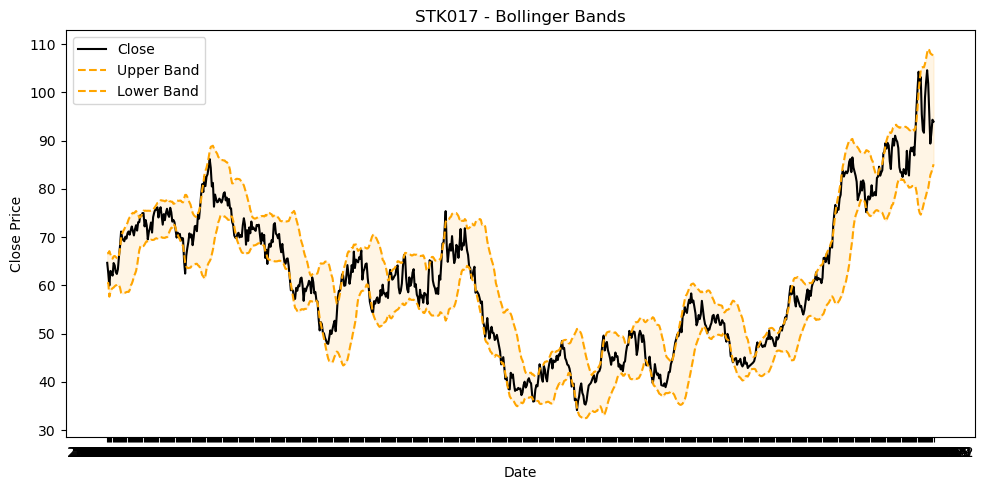

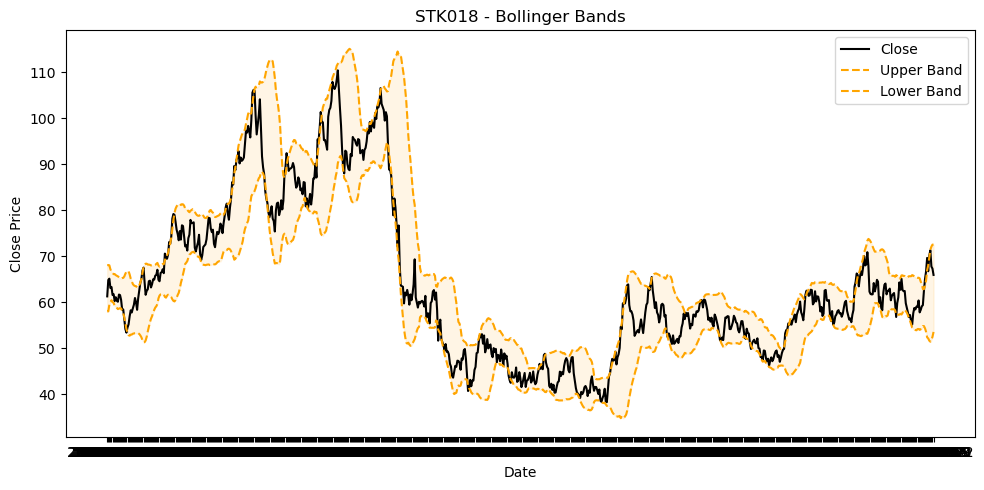

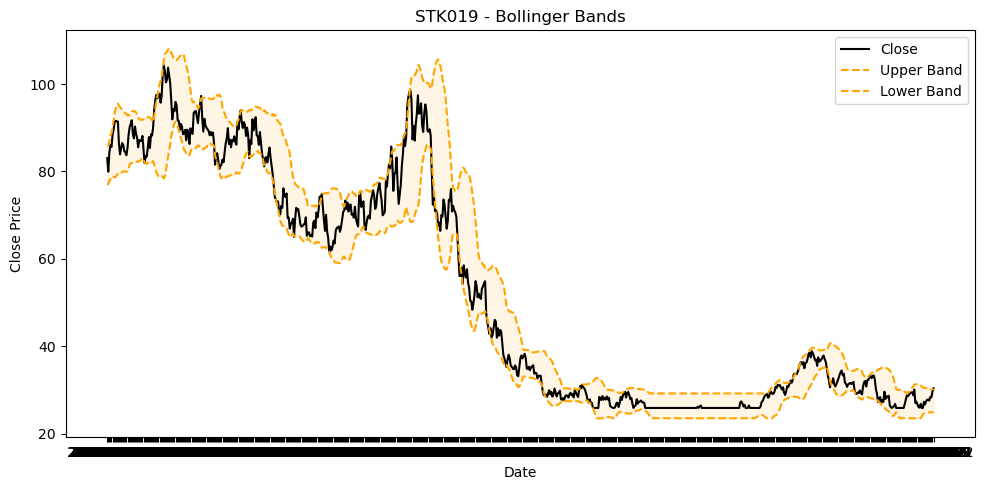

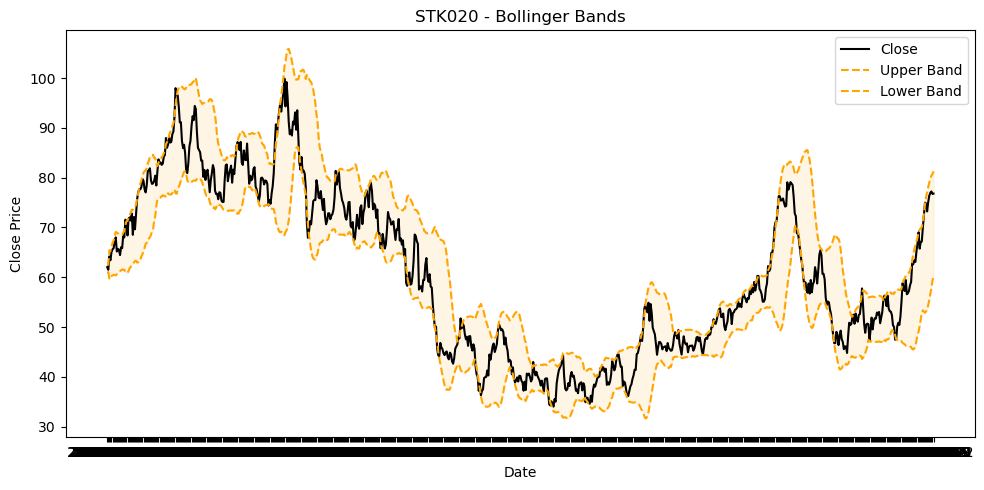

In [14]:
# Get all unique tickers
tickers = df['ticker'].unique()

# Loop through each ticker
for stock in tickers:
    subset = df[df['ticker'] == stock].copy()

    # Create figure for this stock
    plt.figure(figsize=(10, 5))

    # --- Bollinger Bands Plot ---
    plt.plot(subset['date'], subset['close'], label='Close', color='black')
    plt.plot(subset['date'], subset['bb_upper'], label='Upper Band', color='orange', linestyle='--')
    plt.plot(subset['date'], subset['bb_lower'], label='Lower Band', color='orange', linestyle='--')
    plt.fill_between(subset['date'], subset['bb_lower'], subset['bb_upper'], color='orange', alpha=0.1)

    plt.title(f'{stock} - Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.tight_layout()
    plt.show()


### 5. Correlation Analysis

#### Create correlation heatmap of selected features

Numerical features:
 ['open', 'high', 'low', 'close', 'volume', 'adjusted_close', 'sma_20', 'sma_50', 'sma_200', 'ema_12', 'ema_26', 'macd', 'macd_signal', 'macd_histogram', 'rsi_14', 'bb_middle', 'bb_upper', 'bb_lower', 'bb_width', 'true_range', 'atr_14', 'volume_sma_20', 'volume_ratio', 'momentum_10', 'momentum_20', 'price_to_sma_50', 'volatility_20', 'future_return_5d', 'return']


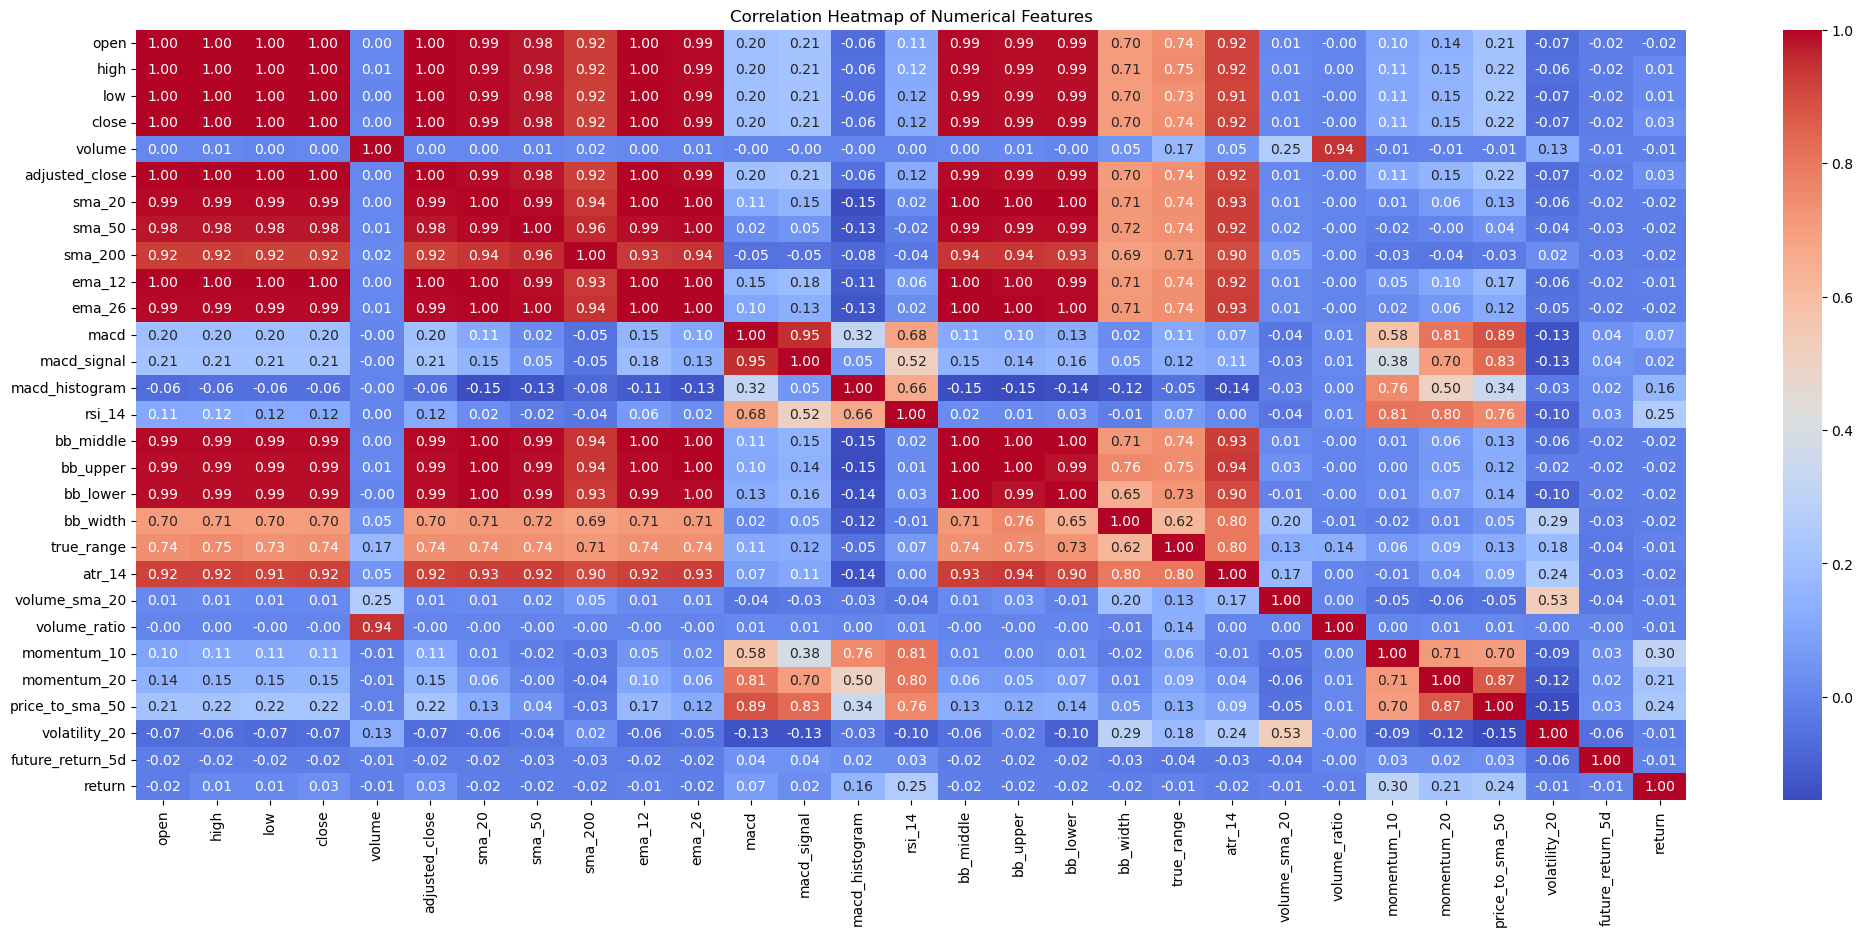

In [15]:
# Select numerical features

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical features:\n", numerical_features)

# Compute correlation matrix

corr_matrix = df[numerical_features].corr()

# Plot correlation heatmap

plt.figure(figsize=(25,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### Identify highly correlated features (potential multicollinearity)

In [21]:
from itertools import combinations

# Identify highly correlated features (|corr| > 0.8)
# Exclude self-correlation
high_corr_pairs = []

for (feat1, feat2) in combinations(numerical_features, 2):
    corr_value = corr_matrix.loc[feat1, feat2]
    if abs(corr_value) > 0.8:
        high_corr_pairs.append((feat1, feat2, corr_value))

print("\nHighly correlated feature pairs (|corr| > 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} & {pair[1]} -> Correlation: {pair[2]:.2f}")


Highly correlated feature pairs (|corr| > 0.8):
open & high -> Correlation: 1.00
open & low -> Correlation: 1.00
open & close -> Correlation: 1.00
open & adjusted_close -> Correlation: 1.00
open & sma_20 -> Correlation: 0.99
open & sma_50 -> Correlation: 0.98
open & sma_200 -> Correlation: 0.92
open & ema_12 -> Correlation: 1.00
open & ema_26 -> Correlation: 0.99
open & bb_middle -> Correlation: 0.99
open & bb_upper -> Correlation: 0.99
open & bb_lower -> Correlation: 0.99
open & atr_14 -> Correlation: 0.92
high & low -> Correlation: 1.00
high & close -> Correlation: 1.00
high & adjusted_close -> Correlation: 1.00
high & sma_20 -> Correlation: 0.99
high & sma_50 -> Correlation: 0.98
high & sma_200 -> Correlation: 0.92
high & ema_12 -> Correlation: 1.00
high & ema_26 -> Correlation: 0.99
high & bb_middle -> Correlation: 0.99
high & bb_upper -> Correlation: 0.99
high & bb_lower -> Correlation: 0.99
high & atr_14 -> Correlation: 0.92
low & close -> Correlation: 1.00
low & adjusted_close 

**Insight:**

Price columns are strongly positively correlated; some indicators correlate moderately (MACD with moving averages).

# Feature Selection

In [22]:
df.shape

(15502, 33)

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.isna().sum()

ticker               0
date                 0
open                 0
high                 0
low                  0
close                0
volume               0
adjusted_close       0
sma_20               0
sma_50               0
sma_200              0
ema_12               0
ema_26               0
macd                 0
macd_signal          0
macd_histogram       0
rsi_14               0
bb_middle            0
bb_upper             0
bb_lower             0
bb_width             0
true_range           0
atr_14               0
volume_sma_20        0
volume_ratio         0
momentum_10          0
momentum_20          0
price_to_sma_50      0
volatility_20        0
future_return_5d     0
trend_label          0
sector               0
return              20
dtype: int64

### 1. Feature selection 12-15

In [25]:
# df = pd.read_csv("/mnt/data/clean_clipped_data.csv")

# Define target
target_col = "trend_label"

# Remove non-feature columns
drop_cols = ["ticker", "date", "sector", target_col]

# Create X and y
X = df.drop(columns=[c for c in drop_cols if c in df.columns])
y = df[target_col]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (15502, 29)
y shape: (15502,)


In [26]:
features = X.columns.tolist()

In [27]:
# Group by feature categories (domain knowledge)
# We look for known feature types in column names

features = X.columns.tolist()

categories = {
    'momentum': [f for f in features if 'momentum' in f],
    'trend': [f for f in features if 'sma' in f or 'ema' in f or 'macd' in f],
    'volatility': [f for f in features if 'volatility' in f or 'atr' in f or 'bb' in f],
    'volume': [f for f in features if 'vol' in f or 'obv' in f]
}

print("\nFeature Categories (detected by name):")
for cat, cols in categories.items():
    print(f"{cat.title()} ({len(cols)} features): {cols[:6]}...")


Feature Categories (detected by name):
Momentum (2 features): ['momentum_10', 'momentum_20']...
Trend (10 features): ['sma_20', 'sma_50', 'sma_200', 'ema_12', 'ema_26', 'macd']...
Volatility (6 features): ['bb_middle', 'bb_upper', 'bb_lower', 'bb_width', 'atr_14', 'volatility_20']...
Volume (4 features): ['volume', 'volume_sma_20', 'volume_ratio', 'volatility_20']...


In [28]:
domain_selected = [
    # Momentum
    'momentum_10', 'momentum_20',

    # Trend / MA
    'sma_20', 'sma_50', 'sma_200', 'ema_12', 'ema_26', 'macd'

    # Momentum indicators
    'rsi_14', 'macd', 'macd_signal',

    # Volatility
    'bb_middle', 'bb_upper', 'bb_lower', 'bb_width', 'atr_14', 'volatility_20'

    # Volume
    'volume', 'volume_sma_20', 'volume_ratio', 'volatility_20'

    # Position
    'bb_position', 'stochastic_k'
]


In [29]:
domain_selected = [f for f in domain_selected if f in df.columns]
print("Final Selected Features:", domain_selected)

Final Selected Features: ['momentum_10', 'momentum_20', 'sma_20', 'sma_50', 'sma_200', 'ema_12', 'ema_26', 'macd', 'macd_signal', 'bb_middle', 'bb_upper', 'bb_lower', 'bb_width', 'atr_14', 'volume_sma_20', 'volume_ratio']


#### Correlation analysis among selected numeric features

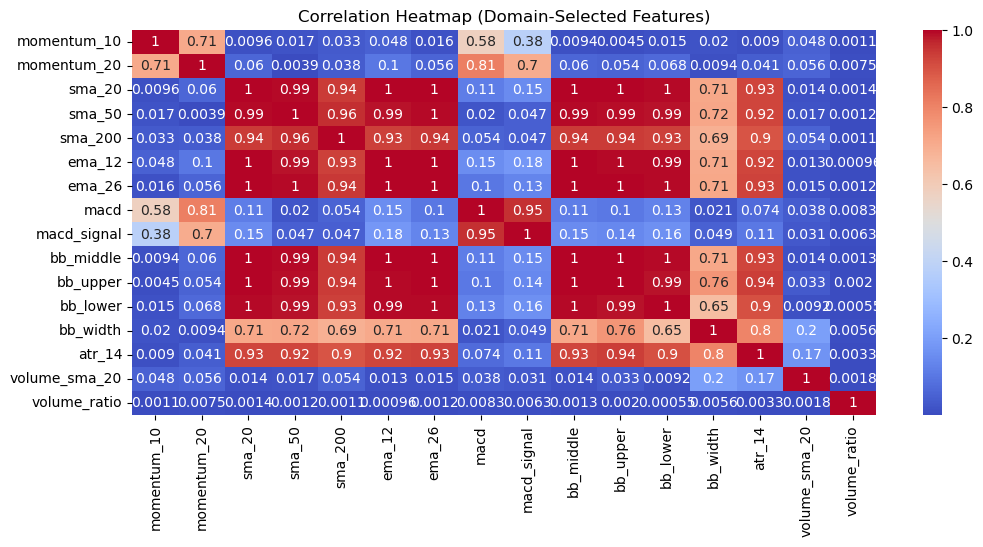

In [30]:
corr_matrix = df[domain_selected].corr().abs()

# Visualize correlation
plt.figure(figsize=(12,5))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap (Domain-Selected Features)")
plt.show()

In [40]:
# Remove features that are too correlated (>|0.97|)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.97)]
selected_final = [f for f in domain_selected if f not in to_drop]

print("\nHighly correlated features removed:", to_drop)
print("\n✅ Final selected features (", len(selected_final), "):")
print(selected_final)


Highly correlated features removed: ['sma_50', 'ema_12', 'ema_26', 'bb_middle', 'bb_upper', 'bb_lower']

✅ Final selected features ( 10 ):
['momentum_10', 'momentum_20', 'sma_20', 'sma_200', 'macd', 'macd_signal', 'bb_width', 'atr_14', 'volume_sma_20', 'volume_ratio']


In [44]:
must_keep = ['ema_12']

# keep only those that exist in df
must_keep = [f for f in must_keep if f in df.columns]

# add them back
selected_final = list(set(selected_final + must_keep))

In [45]:
print(selected_final)

['macd', 'macd_signal', 'momentum_20', 'volume_ratio', 'sma_20', 'volume_sma_20', 'ema_12', 'bb_width', 'momentum_10', 'sma_200', 'atr_14']


### 2. Create Modeling Dataset

#### Filter to selected features + target variable (trend_label)

In [46]:
target = "trend_label"

model_df = df[['date'] + selected_final + [target]].copy()

#### Remove rows with missing target variable

In [47]:
model_df = model_df.dropna(subset=[target])

In [48]:
model_df.head(2)

date      macd  macd_signal  momentum_20  volume_ratio   sma_20  \
0  2021-01-04  0.000000     0.000000    -0.045594      1.000000  160.110   
1  2021-01-05  0.179487     0.035897    -0.045594      1.153842  161.235   

   volume_sma_20      ema_12  bb_width  momentum_10  sma_200  atr_14  \
0    1121206.855  160.110000  6.363961    -0.008557  160.110   2.880   
1    1137664.500  160.456154  6.363961    -0.008557  161.235   4.135   

  trend_label  
0     Uptrend  
1    Sideways

#### Verify no data leakage (only use features available at prediction time)

In [49]:
model_df.to_csv("modeling_dataset.csv", index=False)
print("Saved modeling_dataset.csv")

Saved modeling_dataset.csv


### 3. Train Test Split

In [50]:
# Load model dataset
model_df = pd.read_csv("modeling_dataset.csv")

In [51]:
# Sort by date
model_df = model_df.sort_values(by='date')

In [52]:
# Split chronologically (NO shuffle)
split_idx = int(len(model_df) * 0.7)

train = model_df.iloc[:split_idx]
test = model_df.iloc[split_idx:]

In [53]:
# Seperate Future and target
X_train = train.drop(['trend_label', 'date'], axis=1)
y_train = train['trend_label']

X_test = test.drop(['trend_label', 'date'], axis=1)
y_test = test['trend_label']

In [54]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 10851
Testing set size: 4651


In [55]:
print("Training set class distribution (%):")
print(y_train.value_counts(normalize=True) * 100)

print("\nTesting set class distribution (%):")
print(y_test.value_counts(normalize=True) * 100)

Training set class distribution (%):
trend_label
Uptrend      35.204129
Downtrend    33.821768
Sideways     30.974104
Name: proportion, dtype: float64

Testing set class distribution (%):
trend_label
Uptrend      36.809288
Sideways     34.035691
Downtrend    29.155020
Name: proportion, dtype: float64


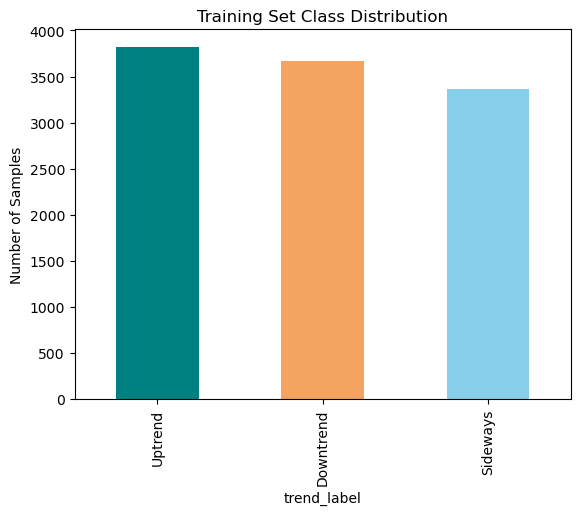

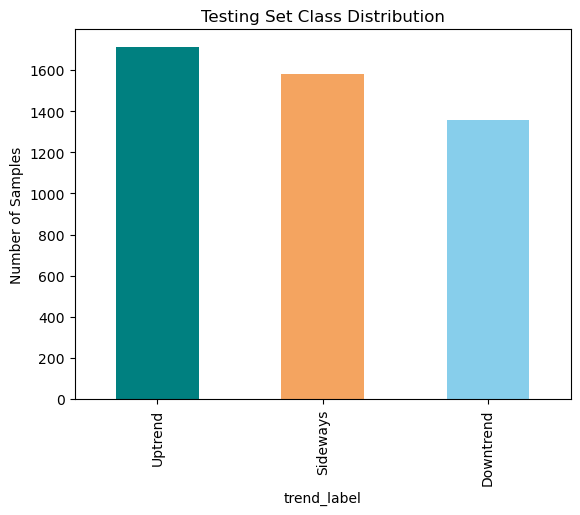

In [56]:
y_train.value_counts().plot(kind='bar', color=['teal','sandybrown','skyblue'])
plt.title("Training Set Class Distribution")
plt.ylabel("Number of Samples")
plt.show()

y_test.value_counts().plot(kind='bar', color=['teal','sandybrown','skyblue'])
plt.title("Testing Set Class Distribution")
plt.ylabel("Number of Samples")
plt.show()

## Save the ready-to-use train and test datasets

In [58]:
train.to_csv("train_dataset.csv", index=False)
test.to_csv("test_dataset.csv", index=False)

print("✅ train_dataset.csv and test_dataset.csv saved successfully.")

✅ train_dataset.csv and test_dataset.csv saved successfully.
